In [1]:
"""
This code belongs to the paper:
-- Y.C. Mathpati, K.S. More, T. Tripura, R. Nayek, S. Chakraborty (2023)
   MAntRA: A framework for model agnostic reliability analysis
   
-- This code is for 3-DOF nonlinear oscillator Drift 1.
"""

'\nThis code belongs to the paper:\n-- Y.C. Mathpati, K.S. More, T. Tripura, R. Nayek, S. Chakraborty (2023)\n   MAntRA: A framework for model agnostic reliability analysis\n   \n-- This code is for 3-DOF nonlinear oscillator Drift 1.\n'

# Drift 1 Equation discovery

In [1]:
import numpy as np
  
"""
The Dictionary creation part:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
"""
def library(xt, polyn, harmonic):
    if polyn == 0:
        polyn = 1
    
    # The polynomial is (x1 + x2)^p, with p is the order
    # poly order 0
    ind = 0
    n = len(xt[0])
    D = np.ones([n,1])
    
    if polyn >= 1:
        # poly order 1
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(xt[i,:])
            D = np.append(D, new, axis=1)
    if polyn >= 2: 
        # ploy order 2
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                ind = ind+1
                new = np.multiply(xt[i,:], xt[j,:])
                new = np.vstack(new)
                D = np.append(D, new, axis=1) 
    if polyn >= 3:    
        # ploy order 3
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    ind = ind+1
                    new = np.multiply(np.multiply(xt[i,:], xt[j,:]), xt[k,:])
                    new = np.vstack(new)
                    D = np.append(D, new, axis=1) 
    if polyn >= 4:
        # ploy order 4
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in range(k,len(xt)):
                        ind = ind+1
                        new = np.multiply(np.multiply(xt[i,:], xt[j,:]), xt[k,:])
                        new = np.multiply(new, xt[l,:])
                        new = np.vstack(new)
                        D = np.append(D, new, axis=1) 
    if polyn >= 5:
        # ploy order 5
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in  range(k,len(xt)):
                        for m in  range(l,len(xt)):
                            ind = ind+1
                            new = np.multiply(xt[i,:], xt[j,:])
                            new = np.multiply(new, xt[k,:])
                            new = np.multiply(new, xt[l,:])
                            new = np.multiply(new, xt[m,:])
                            new = np.vstack(new)
                            D = np.append(D, new, axis=1) 
    if polyn >= 6:
        # ploy order 6
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in  range(k,len(xt)):
                        for m in  range(l,len(xt)):
                            for n in  range(m,len(xt)):
                                ind = ind+1
                                new = np.multiply(xt[i,:], xt[j,:])
                                new = np.multiply(new, xt[k,:])
                                new = np.multiply(new, xt[l,:])
                                new = np.multiply(new, xt[m,:])
                                new = np.multiply(new, xt[n,:])
                                new = np.vstack(new)
                                D = np.append(D, new, axis=1) 
    # for the signum or sign operator
    for i in range(len(xt)):
        ind = ind+1
        new = np.vstack(np.sign(xt[i,:]))+0.0001
        D = np.append(D, new, axis=1)
    
    # for the modulus operator
    for i in range(len(xt)):
        ind = ind+1
        new = np.vstack(abs(xt[i,:]))
        D = np.append(D, new, axis=1)
    # for the tensor operator
    for i in range(len(xt)):
        for j in  range(len(xt)):
            ind = ind+1
            new = np.multiply(xt[i,:],abs(xt[j,:]))
            new = np.vstack(new)
            D = np.append(D, new, axis=1)
    if harmonic == 1:
        # for sin(x)
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(np.sin(xt[i,:]))
            D = np.append(D, new, axis=1)
            #  or,
            # ind = ind+1
            # new = np.sin(xt[i,:])
            # D = np.insert(D, ind, new, axis=1)
        # for cos(x)
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(np.cos(xt[i,:]))
            D = np.append(D, new, axis=1)
#     ind = ind+1
    
    # D = D[:, 0:7] 
    ind = len(D[0])
    return D, ind

In [2]:
import numpy as np

"""
A 3 DOF system excited by random noise
-----------------------------------------------------------
"""
def _3_DOF_Duffing_sys(x1, x2, x3, x4, x5, x6, T):
    
    m1, m2, m3 = 1, 1, 1
    c1, c2, c3 = 2, 2, 2
    k1, k2, k3 = 1000, 2000, 3000
    alpha1, alpha2, alpha3 = 100000, 100000, 100000
    sigma1, sigma2, sigma3 = 1, 1, 1 
    
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 500 # no. of samples in the run
    
    
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    y5 = []
    y6 = []
    xz1 = []
    xz2 = []
    xz3 = []
    xzs11 = []
    xzs22 = []
    xzs33 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = np.array([x1, x2, x3, x4, x5, x6])
        x = np.vstack(x0)                                                          # Zero initial condition.
        for n in range(len(t)-1):
            
            dW = np.sqrt(dt)*np.random.randn(3)
            dW2 = dW[0]
            dW4 = dW[1]
            dW6 = dW[2]
            
            a1 = x0[1]
            a2 = -(c1/m1)*x0[1]-(k1/m1)*x0[0]-(c2/m1)*(x0[1]-x0[3])-k2*(x0[0]-x0[2])-(alpha1/m1)*(x0[0])**3-(alpha2/m1)*(x0[0]-x0[2])**3
            a3 = x0[3]
            a4 = -(c2/m2)*(x0[3]-x0[1])-(k2/m2)*(x0[2]-x0[0])-(c3/m2)*(x0[3]-x0[5])-k3/m2*(x0[2]-x0[4])-(alpha2/m2)*(x0[2]-x0[0])**3-(alpha3/m2)*(x0[2]-x0[4])**3
            a5 = x0[5]
            a6 = -(c3/m3)*(x0[5]-x0[3])-(k3/m3)*(x0[4]-x0[2])-(alpha3/m3)*(x0[4]-x0[2])**3
            b2 = (sigma1/m1)*x0[0]
            b4 = (sigma2/m2)*x0[2]
            b6 = (sigma3/m3)*x0[4]

            sol1 = x0[0] + a1*dt 
            sol2 = x0[1] + a2*dt + b2*dW2
            sol3 = x0[2] + a3*dt 
            sol4 = x0[3] + a4*dt + b4*dW4
            sol5 = x0[4] + a5*dt 
            sol6 = x0[5] + a6*dt + b6*dW6
            
            x0 = np.array([sol1, sol2, sol3, sol4, sol5, sol6])
            x = np.column_stack((x, x0))
            
        y1.append(x[0,:])
        y2.append(x[1,:])
        y3.append(x[2,:])
        y4.append(x[3,:])
        y5.append(x[4,:])
        y6.append(x[5,:])
        
        zint1 = x[1,0:-1]
        xfinal1 = x[1,1:] 
        xmz1 = (xfinal1 - zint1) # 'x(t)-z' vector
        
        zint2 = x[3, 0:-1]
        xfinal2 = x[3, 1:] 
        xmz2 = (xfinal2 - zint2) # 'x2(t)-z2' vector
        
        zint3 = x[5, 0:-1]
        xfinal3 = x[5, 1:] 
        xmz3 = (xfinal3 - zint3) # 'x2(t)-z2' vector
        
        xz1.append(xmz1)
        xz2.append(xmz2)
        xz3.append(xmz3)
        
        xmzsq11 = np.multiply(xmz1, xmz1)
        xzs11.append(xmzsq11)
        
        xmzsq22 = np.multiply(xmz2, xmz2)
        xzs22.append(xmzsq22)
        
        xmzsq33 = np.multiply(xmz3, xmz3)
        xzs33.append(xmzsq33)
        
        
    xz1 = pow(dt,-1)*np.mean(np.array(xz1), axis = 0)
    xz2 = pow(dt,-1)*np.mean(np.array(xz2), axis = 0)
    xz3 = pow(dt,-1)*np.mean(np.array(xz3), axis = 0)
    
    xzs11 = pow(dt,-1)*np.mean(np.array(xzs11), axis = 0)
    xzs22 = pow(dt,-1)*np.mean(np.array(xzs22), axis = 0)
    xzs33 = pow(dt,-1)*np.mean(np.array(xzs33), axis = 0) 
    
    y1 = np.array(y1)
    y2 = np.array(y2)
    y3 = np.array(y3)
    y4 = np.array(y4)
    y5 = np.array(y5)
    y6 = np.array(y6)
    
    time = t[0:-1]
    
    return xz1, xz2, xz3, xzs11, xzs22, xzs33, y1, y2, y3, y4, y5, y6, time

In [3]:
T = 1
# Response generation: 
x1, x2, x3, x4, x5, x6 = 0.05, 0, 0.01, 0, 0.01, 0 # initial displacement for 3dof
xdrift1, xdrift2, xdrift3, xdiff11, xdiff22, xdiff33, y1, y2, y3, y4, y5, y6, t_eval = _3_DOF_Duffing_sys(x1, x2, x3, x4, x5, x6, T)

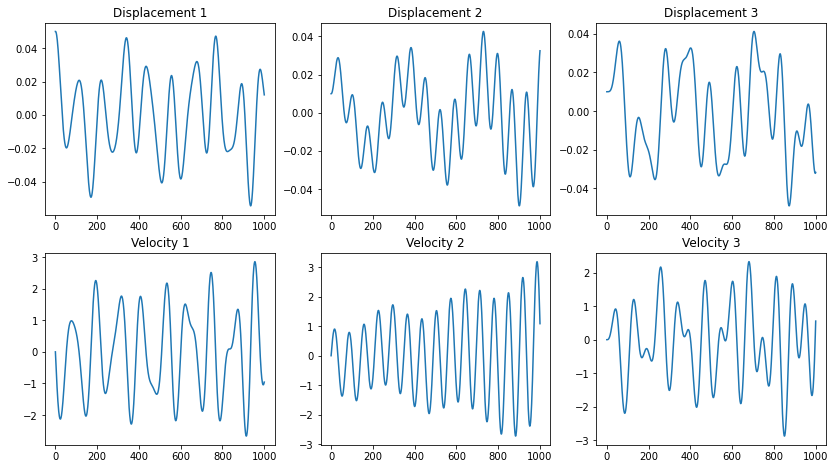

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,12))
plt.subplot(3,3,1)
plt.plot(np.mean((y1), axis=0))
plt.title('Displacement 1')
plt.subplot(3,3,2)
plt.plot(np.mean((y3), axis=0))
plt.title('Displacement 2')
plt.subplot(3,3,3)
plt.plot(np.mean((y5), axis=0))
plt.title('Displacement 3')
plt.subplot(3,3,4)
plt.plot(np.mean((y2), axis=0))
plt.title('Velocity 1')
plt.subplot(3,3,5)
plt.plot(np.mean((y4), axis=0))
plt.title('Velocity 2')
plt.subplot(3,3,6)
plt.plot(np.mean((y6), axis=0))
plt.title('Velocity 3')

plt.show()

In [5]:
# Expected Dictionary Creation:
libr = []
for j in range(len(y1)):
    data = np.row_stack((y1[j,0:-1], y2[j,0:-1], y3[j,0:-1], y4[j,0:-1], y5[j,0:-1], y6[j,0:-1]))
    Dtemp, nl = library(data, 4, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)
xdts = xdrift1

In [6]:
D = Dictionary

In [8]:
Dict = D.reshape(-1, order='F')
Dict.shape

(258000,)

In [9]:
from __future__ import print_function

#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[2.0],[3.0],[4.0],[5.0],[29.0],[31.0],[40.0],[65.0]]), 'Value': matlab.double([[-2999.634327685267],[-3.9996748182133257],[2000.025075695057],[1.9995322462323943],[-200258.2158849541],[299670.0409335592],[-300323.0787848598],[100013.84029675469]])}


In [10]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
d

[-2999.634327685267,
 -3.9996748182133257,
 2000.025075695057,
 1.9995322462323943,
 -200258.2158849541,
 299670.0409335592,
 -300323.0787848598,
 100013.84029675469]

In [11]:
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
b

[1, 2, 3, 4, 28, 30, 39, 64]

In [12]:
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
initz0

array([0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [17]:
import warnings
import math
import numpy as np
import scipy as sp
import sympy as smp
from scipy import stats
from numpy import linalg as la
import matplotlib.pyplot as plt
from numpy.random import gamma
from scipy.special import loggamma

def Variational_Bayes_Code(X, y, initz0, tol, verbosity):

    if (len(X) == 0 or len(y) == 0):
        raise Exception('X and or y is missing')
        
    if (len(X) != len(y)):
        raise Exception('Number of observations do not match')
        
    X = stats.zscore(X, ddof = 1)         
    X = np.c_[np.ones(len(X)),X]          
    y = y - np.mean(y)
    N = len(X)
    # Prior parameters of noise variance (Inverse Gamma dist)
    A = 1e-4
    B = 1e-4
    vs = 10
    tau0 = 1000
    
    if (len(initz0) == 0):
        raise Exception('No initial value of z found')
    else:
        p0 = expit(-0.5*(np.sqrt(N)))       
        
        # Adding the intercept indicator variable (slightly less than 1 to prevent log(0) values) 
        initz = np.hstack((1,initz0))   

        DS,LLcvg  = run_VB2(X, y, vs, A, B, tau0, p0, initz, tol, verbosity)    
        # This is function which will come first
        
    out_vb   = DS
    a = DS['zmean'] > 0.5
    count = 0
    modelIdx = []
    for i in a:
        if i == True:
            modelIdx.append(count)
        count += 1
            
    modelIdx = np.setdiff1d(modelIdx,0)
    out_vb['modelIdx'] = modelIdx-1
    out_vb['Zmed'] = DS['zmean'][modelIdx]
    out_vb['Wsel'] = DS['wmean'][modelIdx]
    out_vb['Wcov'] = DS['wCOV'][modelIdx, modelIdx]
    out_vb['sig2'] = DS['sig2']
    
    return out_vb

DS = {}
def run_VB2(Xc, yc, vs, A, B, tau0, p0, initz, tol, verbosity):
    """This function is the implementation of VB from John T. Ormerod paper (2014)
       This implementation uses slab scaling by noise variance
       vs    : treated as a constant
       A,B   : constants of the IG prior over noise variance
       tau0  : Expected value of (sigma^{-2})
       p0    : inclusion probablility
       initz : Initial value of z
       Xc    : Centered and standardized dictionary except the first column
       yc    : Centered observations """
    
    Lambda    = logit(p0)
    iter_     = 0
    max_iter  = 100
    LL        = np.zeros(max_iter)        
    zm        = np.reshape(initz,(-1))            
    taum      = tau0                      
    invVs     = 1/vs
    
    X = Xc
    y = yc
    XtX = (X.T) @ X
    XtX = 0.5*(XtX + (XtX).T)
    Xty = (X.T) @ y                 
    yty = (y.T) @ y

    eyep = np.eye(len(XtX))
    [N,p] = X.shape
    allidx = np.arange(p)
    zm[0] = 1                                                                   # Always include the intercept 
    Abar    = (A + 0.5*N + 0.5*p)
    converged = 0
    
    while (converged==0):
        if (iter_==100):
            break
        
        Zm       = np.diag(zm)
        Omg      = (np.reshape(zm,(-1,1)) @ np.reshape(zm,(1,-1))) + (Zm @ (eyep-Zm))
        # Update the mean and covariance of the coefficients given mean of z
        term1    = XtX * Omg                                                       # elementwisw multiplication
        invSigma = taum * (term1 + invVs * eyep)
        invSigma = 0.5*(invSigma + invSigma.T)                                     # symmetric
        Sigma    = la.inv(invSigma) @ eyep
        mu       = taum * (Sigma @ Zm @ Xty)                                       # @ ---> matrix multiplication
        
        # Update tau related to sigma
        term2    = 2 * Xty @ Zm @ mu
        term3    =  np.reshape(mu,(len(initz0),1)) @ np.reshape(mu,(1,len(initz0)))+ Sigma
        term4    = yty - term2 + np.trace((term1 + invVs * eyep) @ term3)    
        s        = B + 0.5*term4
        
        if s<0:
            warnings.warn('s turned out be less than 0. Taking absolute value')
            s = B + 0.5*abs(term4)
        
        taum     = Abar / s
        zstr   = zm

        order   = np.setdiff1d(np.random.permutation(p), 0, assume_unique=True)
        for j in order: 
            muj     = mu[j]                            
            sigmaj  = Sigma[j,j]
            
            remidx  = np.setdiff1d(allidx,j)
            mu_j    = mu[remidx]
            Sigma_jj= Sigma[remidx,j]
            etaj    = (Lambda - 0.5 * taum * ((muj**2 + sigmaj) * XtX[j,j]) 
                       + taum * np.reshape(X[:,j],(1,-1)) @ (np.reshape(y,(-1,1))*muj 
                        -X[:,remidx] @ np.diag(zstr[remidx]) @ ((mu_j * muj + Sigma_jj).reshape(-1,1))))
            zstr[j] = expit(etaj)
            
        zm = zstr
        
        # Calculate marginal log-likelihood
        
        LL[iter_] = ( 0.5*p 
                    - 0.5*N*np.log(2*np.pi) 
                    + 0.5*p*np.log(invVs) 
                    + A*np.log(B)
                    - loggamma(A)
                    + loggamma(Abar) 
                    - Abar*np.log(s)
                    + 0.5*np.log(la.det(Sigma))
                    + np.nansum(zm*(np.log(p0) - np.log(zm))) 
                    + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
        
        if(verbosity):
            print(f'Iteration = {iter_}  log(Likelihood) = {LL[iter_]}')
        
        if(iter_>1):
            cvg = LL[iter_] - LL[iter_-1]
            
            if (cvg < 0 and verbosity):
                print('OOPS!  log(like) decreasing!!')
            elif (cvg<tol or iter_> max_iter):
                converged = 1
                LL = LL[0:iter_]
                
        iter_    = iter_ + 1
    DS['zmean'] = zm
    DS['wmean'] = mu
    DS['wCOV'] = Sigma
    DS['sig2'] = 1/taum
    LLcvg    = LL[-1]
    return DS, LLcvg
    
def logit(C):
    logitC = np.log(C) - np.log(1-C)
    return logitC

def expit(C):
    expitC = 1./(1 + np.exp(-C))
    return expitC

In [18]:
Dict_std = np.std(D1, axis=0)

In [19]:
Dict_std1 = Dict_std.reshape(1,-1)
Dict_std1.shape

(1, 257)

In [21]:
D2 = D1*np.diag(1/Dict_std1)

In [24]:
initz=initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(D2, xdts, initz, tol, verbosity)

print(DS) 

C:\Users\USER\AppData\Local\Temp/ipykernel_9792/1744024245.py:143: RuntimeWarning: divide by zero encountered in log
  + 0.5*np.log(la.det(Sigma))
C:\Users\USER\AppData\Local\Temp/ipykernel_9792/1744024245.py:145: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_9792/1744024245.py:145: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))


Iteration = 0  log(Likelihood) = -inf


C:\Users\USER\AppData\Local\Temp/ipykernel_9792/1744024245.py:172: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\USER\AppData\Local\Temp/ipykernel_9792/1744024245.py:144: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_9792/1744024245.py:144: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


Iteration = 1  log(Likelihood) = -1434.2365369019442
Iteration = 2  log(Likelihood) = -1431.7585201358468
Iteration = 3  log(Likelihood) = -1431.6687500663768
Iteration = 4  log(Likelihood) = -1431.665079570291
Iteration = 5  log(Likelihood) = -1431.6649260636666
Iteration = 6  log(Likelihood) = -1431.6649196140816
{'zmean': array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [25]:
for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (Dict_std1))).reshape(-1)[i])

-2999.279554403426
-4.00187760222764
1999.857956815257
1.9986351108849771
-201228.27112439787
300163.35584627953
-301736.32807745365
100779.03994272072


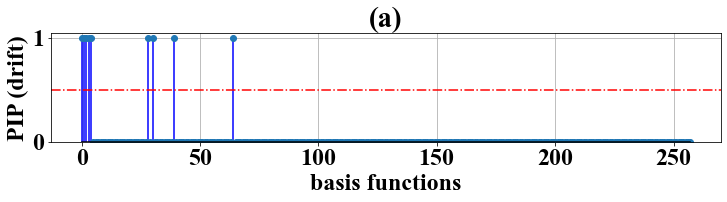

In [29]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 24

figure1=plt.figure(figsize = (12, 2))
xr = np.array(range(nl))
plt.stem(xr,DS['zmean'], use_line_collection = True, linefmt='blue', basefmt="k")
plt.axhline(y= 0.5, color='r', linestyle='-.')
plt.xlabel('basis functions',fontweight='bold')
plt.ylabel('PIP (drift)', fontweight='bold');
plt.title('(a)', fontweight='bold')
plt.grid(True); plt.ylim(0,1.05)
plt.xticks(fontweight='bold'); plt.yticks(fontweight='bold');
figure1.savefig('3dof_drift1.png',format='png',dpi=600,bbox_inches='tight')

# Diffusion 1 Equation discovery

In [1]:
import numpy as np

"""
The Dictionary creation part:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
"""
def library(xt, polyn, harmonic):
    if polyn == 0:
        polyn = 1
    
    # The polynomial is (x1 + x2)^p, with p is the order
    # poly order 0
    ind = 0
    n = len(xt[0])
    D = np.ones([n,1])
    
    if polyn >= 1:
        # poly order 1
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(xt[i,:])
            D = np.append(D, new, axis=1)
    if polyn >= 2: 
        # ploy order 2
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                ind = ind+1
                new = np.multiply(xt[i,:], xt[j,:])
                new = np.vstack(new)
                D = np.append(D, new, axis=1) 
    if polyn >= 3:    
        # ploy order 3
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    ind = ind+1
                    new = np.multiply(np.multiply(xt[i,:], xt[j,:]), xt[k,:])
                    new = np.vstack(new)
                    D = np.append(D, new, axis=1) 
    if polyn >= 4:
        # ploy order 4
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in range(k,len(xt)):
                        ind = ind+1
                        new = np.multiply(np.multiply(xt[i,:], xt[j,:]), xt[k,:])
                        new = np.multiply(new, xt[l,:])
                        new = np.vstack(new)
                        D = np.append(D, new, axis=1) 
    if polyn >= 5:
        # ploy order 5
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in  range(k,len(xt)):
                        for m in  range(l,len(xt)):
                            ind = ind+1
                            new = np.multiply(xt[i,:], xt[j,:])
                            new = np.multiply(new, xt[k,:])
                            new = np.multiply(new, xt[l,:])
                            new = np.multiply(new, xt[m,:])
                            new = np.vstack(new)
                            D = np.append(D, new, axis=1) 
    if polyn >= 6:
        # ploy order 6
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in  range(k,len(xt)):
                        for m in  range(l,len(xt)):
                            for n in  range(m,len(xt)):
                                ind = ind+1
                                new = np.multiply(xt[i,:], xt[j,:])
                                new = np.multiply(new, xt[k,:])
                                new = np.multiply(new, xt[l,:])
                                new = np.multiply(new, xt[m,:])
                                new = np.multiply(new, xt[n,:])
                                new = np.vstack(new)
                                D = np.append(D, new, axis=1) 
#     # for the signum or sign operator
#     for i in range(len(xt)):
#         ind = ind+1
#         new = np.vstack(np.sign(xt[i,:]))+0.0001
#         D = np.append(D, new, axis=1)
    
#     # for the modulus operator
#     for i in range(len(xt)):
#         ind = ind+1
#         new = np.vstack(abs(xt[i,:]))
#         D = np.append(D, new, axis=1)
#     # for the tensor operator
#     for i in range(len(xt)):
#         for j in  range(len(xt)):
#             ind = ind+1
#             new = np.multiply(xt[i,:],abs(xt[j,:]))
#             new = np.vstack(new)
#             D = np.append(D, new, axis=1)
#     if harmonic == 1:
#         # for sin(x)
#         for i in range(len(xt)):
#             ind = ind+1
#             new = np.vstack(np.sin(xt[i,:]))
#             D = np.append(D, new, axis=1)
#             #  or,
#             # ind = ind+1
#             # new = np.sin(xt[i,:])
#             # D = np.insert(D, ind, new, axis=1)
#         # for cos(x)
#         for i in range(len(xt)):
#             ind = ind+1
#             new = np.vstack(np.cos(xt[i,:]))
#             D = np.append(D, new, axis=1)
# #     ind = ind+1
    
    # D = D[:, 0:7] 
    ind = len(D[0])
    return D, ind

In [2]:
import numpy as np
"""
A 3 DOF Duffing system excited by random noise
-----------------------------------------------------------
"""
def _3_DOF_Duffing_sys(x1, x2, x3, x4, x5, x6, T):
    # parameters of Duffing oscillator in Equation
    m1, m2, m3 = 1, 1, 1
    c1, c2, c3 = 2, 2, 2
    k1, k2, k3 = 1000, 2000, 3000
    alpha1, alpha2, alpha3 = 100000, 100000, 100000
    sigma1, sigma2, sigma3 = 1, 1, 1
    
    # solution by Taylor 1.5 strong scheme Run with dt=0.01
    # -------------------------------------------------------
    # T = 1
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 500 # no. of samples in the run
    #delmat = np.row_stack(([np.sqrt(dt), 0],[(dt**1.5)/2, (dt**1.5)/(2*np.sqrt(3))]))
    
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    y5 = []
    y6 = []
    xz1 = []
    xz2 = []
    xz3 = []
    xzs11 = []
    xzs22 = []
    xzs33 = []
#     np.random.seed(4)
    np.random.seed(5)
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = np.array([x1, x2, x3, x4, x5, x6])
        x = np.vstack(x0)                                                          # Zero initial condition.
        for n in range(len(t)-1):
            
            dW = np.sqrt(dt)*np.random.randn(3)
            dW2 = dW[0]
            dW4 = dW[1]
            dW6 = dW[2]
            
            a1 = x0[1]
            a2 = -(c1/m1)*x0[1]-(k1/m1)*x0[0]-(c2/m1)*(x0[1]-x0[3])-k2*(x0[0]-x0[2])-(alpha1/m1)*(x0[0])**3-(alpha2/m1)*(x0[0]-x0[2])**3
            a3 = x0[3]
            a4 = -(c2/m2)*(x0[3]-x0[1])-(k2/m2)*(x0[2]-x0[0])-(c3/m2)*(x0[3]-x0[5])-k3/m2*(x0[2]-x0[4])-(alpha2/m2)*(x0[2]-x0[0])**3-(alpha3/m2)*(x0[2]-x0[4])**3
            a5 = x0[5]
            a6 = -(c3/m3)*(x0[5]-x0[3])-(k3/m3)*(x0[4]-x0[2])-(alpha3/m3)*(x0[4]-x0[2])**3
            b2 = (sigma1/m1)*x0[0]
            b4 = (sigma2/m2)*x0[2]
            b6 = (sigma3/m3)*x0[4]

            sol1 = x0[0] + a1*dt 
            sol2 = x0[1] + a2*dt + b2*dW2
            sol3 = x0[2] + a3*dt 
            sol4 = x0[3] + a4*dt + b4*dW4
            sol5 = x0[4] + a5*dt 
            sol6 = x0[5] + a6*dt + b6*dW6
            
            x0 = np.array([sol1, sol2, sol3, sol4, sol5, sol6])
            x = np.column_stack((x, x0))
            
        y1.append(x[0,:])
        y2.append(x[1,:])
        y3.append(x[2,:])
        y4.append(x[3,:])
        y5.append(x[4,:])
        y6.append(x[5,:])
        
        zint1 = x[1,0:-1]
        xfinal1 = x[1,1:] 
        xmz1 = (xfinal1 - zint1) # 'x(t)-z' vector
        
        zint2 = x[3, 0:-1]
        xfinal2 = x[3, 1:] 
        xmz2 = (xfinal2 - zint2) # 'x2(t)-z2' vector
        
        zint3 = x[5, 0:-1]
        xfinal3 = x[5, 1:] 
        xmz3 = (xfinal3 - zint3) # 'x2(t)-z2' vector
        
        xz1.append(xmz1)
        xz2.append(xmz2)
        xz3.append(xmz3)
        
        xmzsq11 = np.multiply(xmz1, xmz1)
        xzs11.append(xmzsq11)
        
        xmzsq22 = np.multiply(xmz2, xmz2)
        xzs22.append(xmzsq22)
        
        xmzsq33 = np.multiply(xmz3, xmz3)
        xzs33.append(xmzsq33)
        
    xz1 = pow(dt,-1)*np.mean(np.array(xz1), axis = 0)
    xz2 = pow(dt,-1)*np.mean(np.array(xz2), axis = 0)
    xz3 = pow(dt,-1)*np.mean(np.array(xz3), axis = 0)
    
    xzs11 = pow(dt,-1)*np.mean(np.array(xzs11), axis = 0)
    xzs22 = pow(dt,-1)*np.mean(np.array(xzs22), axis = 0)
    xzs33 = pow(dt,-1)*np.mean(np.array(xzs33), axis = 0) 
    
    y1 = np.array(y1)
    y2 = np.array(y2)
    y3 = np.array(y3)
    y4 = np.array(y4)
    y5 = np.array(y5)
    y6 = np.array(y6)
    
    time = t[0:-1]
    
    return xz1, xz2, xz3, xzs11, xzs22, xzs33, y1, y2, y3, y4, y5, y6, time

In [3]:
import numpy as np

T = 1
# Response generation: 
x1, x2, x3, x4, x5, x6 = 0.05, 0, 0.01, 0, 0.01, 0                       
xdrift1, xdrift2, xdrift3, xdiff11, xdiff22, xdiff33, y1, y2, y3, y4, y5, y6, t_eval = _3_DOF_Duffing_sys(x1, x2, x3, x4, x5, x6, T)

libr = []
for j in range(len(y1)):
    data = np.row_stack((y1[j,0:-1], y2[j,0:-1], y3[j,0:-1], y4[j,0:-1], y5[j,0:-1], y6[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)
xdts = xdiff11

In [4]:
D = Dictionary

In [5]:
D.shape

(1000, 7)

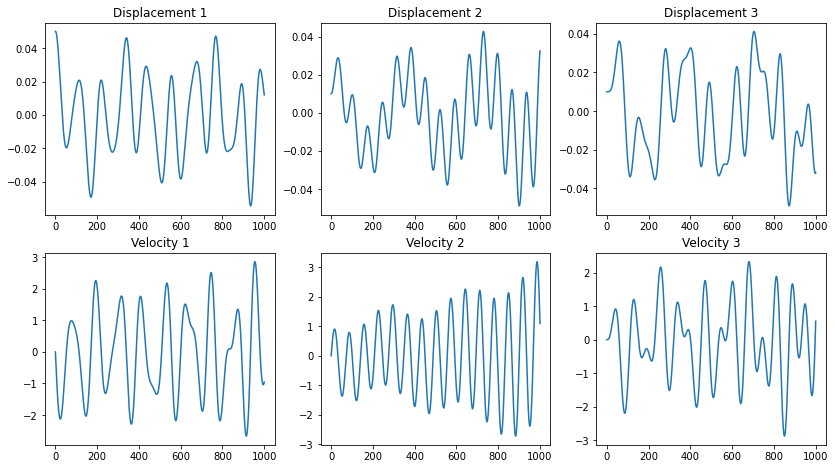

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,12))
plt.subplot(3,3,1)
plt.plot(np.mean((y1), axis=0))
plt.title('Displacement 1')
plt.subplot(3,3,2)
plt.plot(np.mean((y3), axis=0))
plt.title('Displacement 2')
plt.subplot(3,3,3)
plt.plot(np.mean((y5), axis=0))
plt.title('Displacement 3')
plt.subplot(3,3,4)
plt.plot(np.mean((y2), axis=0))
plt.title('Velocity 1')
plt.subplot(3,3,5)
plt.plot(np.mean((y4), axis=0))
plt.title('Velocity 2')
plt.subplot(3,3,6)
plt.plot(np.mean((y6), axis=0))
plt.title('Velocity 3')

plt.show()

In [7]:
Dict = D.reshape(-1,order='F')
Dict.shape

(7000,)

In [ ]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

In [9]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
d

[0.9981345597366362,
 8878.33880932378,
 -8852.437739523688,
 1425.0340480760262,
 -9.255518776540956,
 0.9752920225775336,
 0.5750495296105425,
 6.185423460925651,
 1461.7461919538732,
 43.217884170197784,
 -8.597068334043461,
 -32.2764749439368,
 -45.869768132330094,
 6.687701922535403,
 5856.672290748897,
 29.034172651925882,
 0.486427245312844,
 512.1041126063261,
 9.76831176172491,
 0.12072765737154531,
 -39.511588926213015,
 -0.0391142388705269,
 2.6084443098427528]

In [10]:
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
b

[0,
 7,
 9,
 25,
 38,
 51,
 58,
 73,
 104,
 105,
 114,
 132,
 141,
 146,
 155,
 161,
 165,
 179,
 190,
 195,
 203,
 215,
 218]

In [11]:
initz0_1 = np.zeros(D.shape[1])
for i in b:
    initz0_1[i] = 1
    
initz0_1

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [12]:
import warnings
import math
import numpy as np
import scipy as sp
import sympy as smp
from scipy import stats
from numpy import linalg as la
import matplotlib.pyplot as plt
from numpy.random import gamma
from scipy.special import loggamma

def Variational_Bayes_Code(X, y, initz0, tol, verbosity):

    if (len(X) == 0 or len(y) == 0):
        raise Exception('X and or y is missing')
        
    if (len(X) != len(y)):
        raise Exception('Number of observations do not match')
        
    # X = stats.zscore(X, ddof = 1)         
    # X = np.c_[np.ones(len(X)),X]
    # X = np.c_[np.ones(len(X)),X]          
    # y = y - np.mean(y)
    N = len(X)
    # Prior parameters of noise variance (Inverse Gamma dist)
    A = 1e-4
    B = 1e-4
    vs = 10
    tau0 = 1000
    
    if (len(initz0) == 0):
        raise Exception('No initial value of z found')
    else:
        p0 = expit(-0.5*(np.sqrt(N)))       
        
        # Adding the intercept indicator variable (slightly less than 1 to prevent log(0) values) 
        # initz = np.hstack((1,initz0))  
        initz = initz0

        DS,LLcvg  = run_VB2(X, y, vs, A, B, tau0, p0, initz, tol, verbosity)    
        # This is function which will come first
        
    out_vb   = DS
    a = DS['zmean'] > 0.5
    count = 0
    modelIdx = []
    for i in a:
        if i == True:
            modelIdx.append(count)
        count += 1
            
    modelIdx = np.setdiff1d(modelIdx,0)
    out_vb['modelIdx'] = modelIdx-1
    out_vb['Zmed'] = DS['zmean'][modelIdx]
    out_vb['Wsel'] = DS['wmean'][modelIdx]
    out_vb['Wcov'] = DS['wCOV'][modelIdx, modelIdx]
    out_vb['sig2'] = DS['sig2']
    
    return out_vb

DS = {}
def run_VB2(Xc, yc, vs, A, B, tau0, p0, initz, tol, verbosity):
    """This function is the implementation of VB from John T. Ormerod paper (2014)
       This implementation uses slab scaling by noise variance
       vs    : treated as a constant
       A,B   : constants of the IG prior over noise variance
       tau0  : Expected value of (sigma^{-2})
       p0    : inclusion probablility
       initz : Initial value of z
       Xc    : Centered and standardized dictionary except the first column
       yc    : Centered observations """
    
    Lambda    = logit(p0)
    iter_     = 0
    max_iter  = 100
    LL        = np.zeros(max_iter)        
    zm        = np.reshape(initz,(-1))            
    taum      = tau0                      
    invVs     = 1/vs
    
    X = Xc
    y = yc
    XtX = (X.T) @ X
    XtX = 0.5*(XtX + (XtX).T)
    Xty = (X.T) @ y                 
    yty = (y.T) @ y

    eyep = np.eye(len(XtX))
    [N,p] = X.shape
    allidx = np.arange(p)
    zm[0] = 1                                                                   # Always include the intercept 
    Abar    = (A + 0.5*N + 0.5*p)
    converged = 0
    
    while (converged==0):
        if (iter_==100):
            break
        
        Zm       = np.diag(zm)
        Omg      = (np.reshape(zm,(-1,1)) @ np.reshape(zm,(1,-1))) + (Zm @ (eyep-Zm))
        # Update the mean and covariance of the coefficients given mean of z
        term1    = XtX * Omg                                                       # elementwisw multiplication
        invSigma = taum * (term1 + invVs * eyep)
        invSigma = 0.5*(invSigma + invSigma.T)                                     # symmetric
        Sigma    = la.inv(invSigma) @ eyep
        mu       = taum * (Sigma @ Zm @ Xty)                                       # @ ---> matrix multiplication
        
        # Update tau related to sigma
        term2    = 2 * Xty @ Zm @ mu
        term3    =  np.reshape(mu,(len(initz0),1)) @ np.reshape(mu,(1,len(initz0)))+ Sigma
        term4    = yty - term2 + np.trace((term1 + invVs * eyep) @ term3)    
        s        = B + 0.5*term4
        
        if s<0:
            warnings.warn('s turned out be less than 0. Taking absolute value')
            s = B + 0.5*abs(term4)
        
        taum     = Abar / s
        zstr   = zm

        order   = np.setdiff1d(np.random.permutation(p), 0, assume_unique=True)
        for j in order: 
            muj     = mu[j]                            
            sigmaj  = Sigma[j,j]
            
            remidx  = np.setdiff1d(allidx,j)
            mu_j    = mu[remidx]
            Sigma_jj= Sigma[remidx,j]
            etaj    = (Lambda - 0.5 * taum * ((muj**2 + sigmaj) * XtX[j,j]) 
                       + taum * np.reshape(X[:,j],(1,-1)) @ (np.reshape(y,(-1,1))*muj 
                        -X[:,remidx] @ np.diag(zstr[remidx]) @ ((mu_j * muj + Sigma_jj).reshape(-1,1))))
            zstr[j] = expit(etaj)
            
        zm = zstr
        
        # Calculate marginal log-likelihood
        
        LL[iter_] = ( 0.5*p 
                    - 0.5*N*np.log(2*np.pi) 
                    + 0.5*p*np.log(invVs) 
                    + A*np.log(B)
                    - loggamma(A)
                    + loggamma(Abar) 
                    - Abar*np.log(s)
                    + 0.5*np.log(la.det(Sigma))
                    + np.nansum(zm*(np.log(p0) - np.log(zm))) 
                    + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
        
        if(verbosity):
            print(f'Iteration = {iter_}  log(Likelihood) = {LL[iter_]}')
        
        if(iter_>1):
            cvg = LL[iter_] - LL[iter_-1]
            
            if (cvg < 0 and verbosity):
                print('OOPS!  log(like) decreasing!!')
            elif (cvg<tol or iter_> max_iter):
                converged = 1
                LL = LL[0:iter_]
                
        iter_    = iter_ + 1
    DS['zmean'] = zm
    DS['wmean'] = mu
    DS['wCOV'] = Sigma
    DS['sig2'] = 1/taum
    LLcvg    = LL[-1]
    return DS, LLcvg
    
def logit(C):
    logitC = np.log(C) - np.log(1-C)
    return logitC

def expit(C):
    expitC = 1./(1 + np.exp(-C))
    return expitC

In [13]:
tol = 0.0001
verbosity = True
initz0 = initz0_1
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 

C:\Users\USER\AppData\Local\Temp/ipykernel_18600/3512855728.py:145: RuntimeWarning: divide by zero encountered in log
  + 0.5*np.log(la.det(Sigma))
C:\Users\USER\AppData\Local\Temp/ipykernel_18600/3512855728.py:147: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_18600/3512855728.py:147: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))


Iteration = 0  log(Likelihood) = -inf


C:\Users\USER\AppData\Local\Temp/ipykernel_18600/3512855728.py:174: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\USER\AppData\Local\Temp/ipykernel_18600/3512855728.py:146: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_18600/3512855728.py:146: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


Iteration = 1  log(Likelihood) = -72.94966378847919
Iteration = 2  log(Likelihood) = -70.2195815650009
Iteration = 3  log(Likelihood) = -70.1220492627259
Iteration = 4  log(Likelihood) = -70.1180661447494
Iteration = 5  log(Likelihood) = -70.11789960169114
Iteration = 6  log(Likelihood) = -70.1178926044157
{'zmean': array([1.00000000e+000, 1.35693376e-007, 2.56873750e-008, 1.35474451e-007,
       1.71224287e-010, 1.35478002e-007, 6.03449298e-009, 1.35851019e-007,
       1.35810241e-007, 1.35854512e-007, 1.35771651e-007, 1.35847780e-007,
       1.35794639e-007, 6.79564115e-204, 1.35687853e-007, 1.23255211e-025,
       1.35712017e-007, 4.97889449e-016, 1.35779271e-007, 1.35688915e-007,
       1.35799595e-007, 1.35654639e-007, 0.00000000e+000, 1.35620021e-007,
       6.52350173e-044, 1.35732828e-007, 1.35609925e-007, 1.26283905e-275,
       1.35894303e-007, 1.35894127e-007, 1.35894303e-007, 1.35894130e-007,
       1.35894302e-007, 1.35894154e-007, 1.35699636e-007, 1.35894096e-007,
       

In [16]:
mut1 = DS['wmean']
sigt = DS['wCOV']
DS['zmean'][np.where(DS['zmean']<0.5)] = 0
mut1[np.where(DS['zmean']<0.5)] = 0
DS['zmean'][np.where(np.diag(sigt)>0.001)] = 0
mut1[np.where(np.diag(sigt)>0.05)] = 0
DS['wmean'][np.where(DS['zmean']==0)] = 0

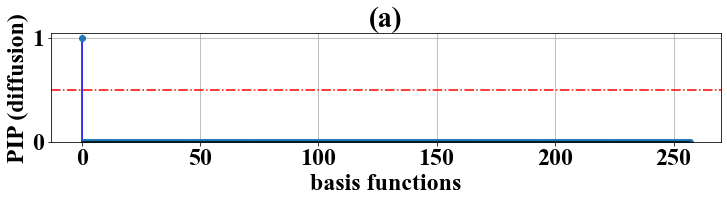

In [18]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 24

figure1=plt.figure(figsize = (12, 2))
xr = np.array(range(nl))
plt.stem(xr,DS['zmean'], use_line_collection = True, linefmt='blue', basefmt="k")
plt.axhline(y= 0.5, color='r', linestyle='-.')
plt.title('(a)', fontweight='bold')
plt.xlabel('basis functions',fontweight='bold')
plt.ylabel('PIP (diffusion)', fontweight='bold');
plt.grid(True); plt.ylim(0,1.05)
plt.xticks(fontweight='bold'); plt.yticks(fontweight='bold');
figure1.savefig('3dof_diff1.png',format='png',dpi=600,bbox_inches='tight')

In [19]:
np.sqrt(DS['wmean'])

array([1.15503231, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Drift 2 Equation discovery

In [1]:
import numpy as np
from scipy import linalg as LA
from sklearn.metrics import mean_squared_error as MSE

"""
The Dictionary creation part:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
"""
def library(xt, polyn, harmonic):
    if polyn == 0:
        polyn = 1
    
    # The polynomial is (x1 + x2)^p, with p is the order
    # poly order 0
    ind = 0
    n = len(xt[0])
    D = np.ones([n,1])
    
    if polyn >= 1:
        # poly order 1
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(xt[i,:])
            D = np.append(D, new, axis=1)
    if polyn >= 2: 
        # ploy order 2
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                ind = ind+1
                new = np.multiply(xt[i,:], xt[j,:])
                new = np.vstack(new)
                D = np.append(D, new, axis=1) 
    if polyn >= 3:    
        # ploy order 3
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    ind = ind+1
                    new = np.multiply(np.multiply(xt[i,:], xt[j,:]), xt[k,:])
                    new = np.vstack(new)
                    D = np.append(D, new, axis=1) 
    if polyn >= 4:
        # ploy order 4
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in range(k,len(xt)):
                        ind = ind+1
                        new = np.multiply(np.multiply(xt[i,:], xt[j,:]), xt[k,:])
                        new = np.multiply(new, xt[l,:])
                        new = np.vstack(new)
                        D = np.append(D, new, axis=1) 
    if polyn >= 5:
        # ploy order 5
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in  range(k,len(xt)):
                        for m in  range(l,len(xt)):
                            ind = ind+1
                            new = np.multiply(xt[i,:], xt[j,:])
                            new = np.multiply(new, xt[k,:])
                            new = np.multiply(new, xt[l,:])
                            new = np.multiply(new, xt[m,:])
                            new = np.vstack(new)
                            D = np.append(D, new, axis=1) 
    if polyn >= 6:
        # ploy order 6
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in  range(k,len(xt)):
                        for m in  range(l,len(xt)):
                            for n in  range(m,len(xt)):
                                ind = ind+1
                                new = np.multiply(xt[i,:], xt[j,:])
                                new = np.multiply(new, xt[k,:])
                                new = np.multiply(new, xt[l,:])
                                new = np.multiply(new, xt[m,:])
                                new = np.multiply(new, xt[n,:])
                                new = np.vstack(new)
                                D = np.append(D, new, axis=1) 
    # for the signum or sign operator
    for i in range(len(xt)):
        ind = ind+1
        new = np.vstack(np.sign(xt[i,:]))+0.0001
        D = np.append(D, new, axis=1)
    
    # for the modulus operator
    for i in range(len(xt)):
        ind = ind+1
        new = np.vstack(abs(xt[i,:]))
        D = np.append(D, new, axis=1)
    # for the tensor operator
    for i in range(len(xt)):
        for j in  range(len(xt)):
            ind = ind+1
            new = np.multiply(xt[i,:],abs(xt[j,:]))
            new = np.vstack(new)
            D = np.append(D, new, axis=1)
    if harmonic == 1:
        # for sin(x)
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(np.sin(xt[i,:]))
            D = np.append(D, new, axis=1)
            #  or,
            # ind = ind+1
            # new = np.sin(xt[i,:])
            # D = np.insert(D, ind, new, axis=1)
        # for cos(x)
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(np.cos(xt[i,:]))
            D = np.append(D, new, axis=1)
#     ind = ind+1
    
    # D = D[:, 0:7] 
    ind = len(D[0])
    return D, ind

In [2]:
import numpy as np

"""
A 3 DOF Duffing Van der pol system excited by random noise
-----------------------------------------------------------
"""
def _3_DOF_Duffing_sys(x1, x2, x3, x4, x5, x6, T):
    
    m1, m2, m3 = 1, 1, 1
    c1, c2, c3 = 2, 2, 2
    k1, k2, k3 = 1000, 2000, 3000
    alpha1, alpha2, alpha3 = 100000, 100000, 100000
    sigma1, sigma2, sigma3 = 1, 1, 1 
    
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 500 # no. of samples in the run
    
    
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    y5 = []
    y6 = []
    xz1 = []
    xz2 = []
    xz3 = []
    xzs11 = []
    xzs22 = []
    xzs33 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = np.array([x1, x2, x3, x4, x5, x6])
        x = np.vstack(x0)                                                          # Zero initial condition.
        for n in range(len(t)-1):
            
            dW = np.sqrt(dt)*np.random.randn(3)
            dW2 = dW[0]
            dW4 = dW[1]
            dW6 = dW[2]
            
            a1 = x0[1]
            a2 = -(c1/m1)*x0[1]-(k1/m1)*x0[0]-(c2/m1)*(x0[1]-x0[3])-k2*(x0[0]-x0[2])-(alpha1/m1)*(x0[0])**3-(alpha2/m1)*(x0[0]-x0[2])**3
            a3 = x0[3]
            a4 = -(c2/m2)*(x0[3]-x0[1])-(k2/m2)*(x0[2]-x0[0])-(c3/m2)*(x0[3]-x0[5])-k3/m2*(x0[2]-x0[4])-(alpha2/m2)*(x0[2]-x0[0])**3-(alpha3/m2)*(x0[2]-x0[4])**3
            a5 = x0[5]
            a6 = -(c3/m3)*(x0[5]-x0[3])-(k3/m3)*(x0[4]-x0[2])-(alpha3/m3)*(x0[4]-x0[2])**3
            b2 = (sigma1/m1)*x0[0]
            b4 = (sigma2/m2)*x0[2]
            b6 = (sigma3/m3)*x0[4]

            sol1 = x0[0] + a1*dt 
            sol2 = x0[1] + a2*dt + b2*dW2
            sol3 = x0[2] + a3*dt 
            sol4 = x0[3] + a4*dt + b4*dW4
            sol5 = x0[4] + a5*dt 
            sol6 = x0[5] + a6*dt + b6*dW6
            
            x0 = np.array([sol1, sol2, sol3, sol4, sol5, sol6])
            x = np.column_stack((x, x0))
            
        y1.append(x[0,:])
        y2.append(x[1,:])
        y3.append(x[2,:])
        y4.append(x[3,:])
        y5.append(x[4,:])
        y6.append(x[5,:])
        
        zint1 = x[1,0:-1]
        xfinal1 = x[1,1:] 
        xmz1 = (xfinal1 - zint1) # 'x(t)-z' vector
        
        zint2 = x[3, 0:-1]
        xfinal2 = x[3, 1:] 
        xmz2 = (xfinal2 - zint2) # 'x2(t)-z2' vector
        
        zint3 = x[5, 0:-1]
        xfinal3 = x[5, 1:] 
        xmz3 = (xfinal3 - zint3) # 'x2(t)-z2' vector
        
        xz1.append(xmz1)
        xz2.append(xmz2)
        xz3.append(xmz3)
        
        xmzsq11 = np.multiply(xmz1, xmz1)
        xzs11.append(xmzsq11)
        
        xmzsq22 = np.multiply(xmz2, xmz2)
        xzs22.append(xmzsq22)
        
        xmzsq33 = np.multiply(xmz3, xmz3)
        xzs33.append(xmzsq33)
        
        
    xz1 = pow(dt,-1)*np.mean(np.array(xz1), axis = 0)
    xz2 = pow(dt,-1)*np.mean(np.array(xz2), axis = 0)
    xz3 = pow(dt,-1)*np.mean(np.array(xz3), axis = 0)
    
    xzs11 = pow(dt,-1)*np.mean(np.array(xzs11), axis = 0)
    xzs22 = pow(dt,-1)*np.mean(np.array(xzs22), axis = 0)
    xzs33 = pow(dt,-1)*np.mean(np.array(xzs33), axis = 0) 
    
    y1 = np.array(y1)
    y2 = np.array(y2)
    y3 = np.array(y3)
    y4 = np.array(y4)
    y5 = np.array(y5)
    y6 = np.array(y6)
    
    time = t[0:-1]
    
    return xz1, xz2, xz3, xzs11, xzs22, xzs33, y1, y2, y3, y4, y5, y6, time

In [3]:
T = 1
# Response generation: 
x1, x2, x3, x4, x5, x6 = 0.05, 0, 0.01, 0, 0.01, 0 # initial displacement for 3dof
xdrift1, xdrift2, xdrift3, xdiff11, xdiff22, xdiff33, y1, y2, y3, y4, y5, y6, t_eval = _3_DOF_Duffing_sys(x1, x2, x3, x4, x5, x6, T)

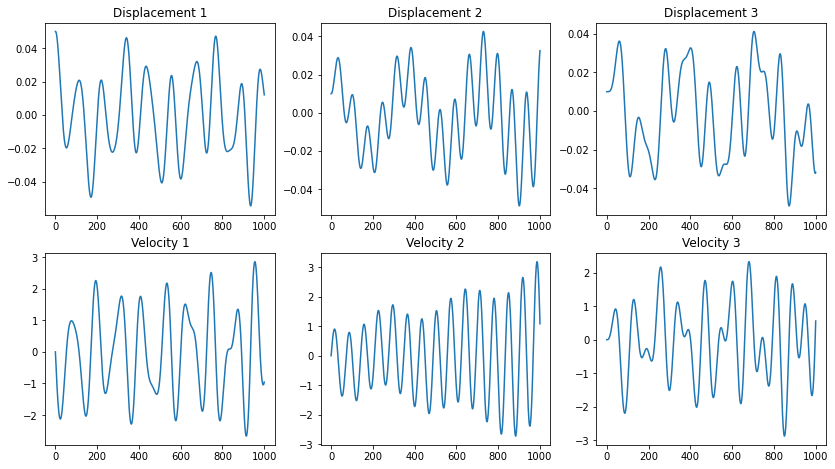

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,12))
plt.subplot(3,3,1)
plt.plot(np.mean((y1), axis=0))
plt.title('Displacement 1')
plt.subplot(3,3,2)
plt.plot(np.mean((y3), axis=0))
plt.title('Displacement 2')
plt.subplot(3,3,3)
plt.plot(np.mean((y5), axis=0))
plt.title('Displacement 3')
plt.subplot(3,3,4)
plt.plot(np.mean((y2), axis=0))
plt.title('Velocity 1')
plt.subplot(3,3,5)
plt.plot(np.mean((y4), axis=0))
plt.title('Velocity 2')
plt.subplot(3,3,6)
plt.plot(np.mean((y6), axis=0))
plt.title('Velocity 3')

plt.show()

In [6]:
# Expected Dictionary Creation:
libr = []
for j in range(len(y1)):
    data = np.row_stack((y1[j,0:-1], y2[j,0:-1], y3[j,0:-1], y4[j,0:-1], y5[j,0:-1], y6[j,0:-1]))
    Dtemp, nl = library(data, 4, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)
xdts = xdrift2

In [7]:
D = Dictionary

In [9]:
Dict = D.reshape(-1, order='F')
Dict.shape

(258000,)

In [10]:
from __future__ import print_function

#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[2.0],[3.0],[4.0],[5.0],[6.0],[7.0],[29.0],[31.0],[40.0],[65.0],[67.0],[72.0],[81.0]]), 'Value': matlab.double([[1999.963865126808],[1.9991646416021345],[-5000.0274955949135],[-3.9990167373810714],[3000.0730271368884],[2.0002186458214357],[99996.62271079744],[-299989.4175326866],[300150.4760968315],[-200021.81906158547],[299981.0637841876],[-299904.32047600485],[99950.8080193673]])}


In [11]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
d

[1999.963865126808,
 1.9991646416021345,
 -5000.0274955949135,
 -3.9990167373810714,
 3000.0730271368884,
 2.0002186458214357,
 99996.62271079744,
 -299989.4175326866,
 300150.4760968315,
 -200021.81906158547,
 299981.0637841876,
 -299904.32047600485,
 99950.8080193673]

In [12]:
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
b

[1, 2, 3, 4, 5, 6, 28, 30, 39, 64, 66, 71, 80]

In [13]:
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
initz0

array([0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [16]:
D1 = D[:,1:]
D1.shape

(1000, 257)

In [19]:
import warnings
import math
import numpy as np
import scipy as sp
import sympy as smp
from scipy import stats
from numpy import linalg as la
import matplotlib.pyplot as plt
from numpy.random import gamma
from scipy.special import loggamma

def Variational_Bayes_Code(X, y, initz0, tol, verbosity):

    if (len(X) == 0 or len(y) == 0):
        raise Exception('X and or y is missing')
        
    if (len(X) != len(y)):
        raise Exception('Number of observations do not match')
        
    X = stats.zscore(X, ddof = 1)         
    X = np.c_[np.ones(len(X)),X]          
    y = y - np.mean(y)
    N = len(X)
    # Prior parameters of noise variance (Inverse Gamma dist)
    A = 1e-4
    B = 1e-4
    vs = 10
    tau0 = 1000
    
    if (len(initz0) == 0):
        raise Exception('No initial value of z found')
    else:
        p0 = expit(-0.5*(np.sqrt(N)))       
        
        # Adding the intercept indicator variable (slightly less than 1 to prevent log(0) values) 
        initz = np.hstack((1,initz0))   

        DS,LLcvg  = run_VB2(X, y, vs, A, B, tau0, p0, initz, tol, verbosity)    
        # This is function which will come first
        
    out_vb   = DS
    a = DS['zmean'] > 0.5
    count = 0
    modelIdx = []
    for i in a:
        if i == True:
            modelIdx.append(count)
        count += 1
            
    modelIdx = np.setdiff1d(modelIdx,0)
    out_vb['modelIdx'] = modelIdx-1
    out_vb['Zmed'] = DS['zmean'][modelIdx]
    out_vb['Wsel'] = DS['wmean'][modelIdx]
    out_vb['Wcov'] = DS['wCOV'][modelIdx, modelIdx]
    out_vb['sig2'] = DS['sig2']
    
    return out_vb

DS = {}
def run_VB2(Xc, yc, vs, A, B, tau0, p0, initz, tol, verbosity):
    """This function is the implementation of VB from John T. Ormerod paper (2014)
       This implementation uses slab scaling by noise variance
       vs    : treated as a constant
       A,B   : constants of the IG prior over noise variance
       tau0  : Expected value of (sigma^{-2})
       p0    : inclusion probablility
       initz : Initial value of z
       Xc    : Centered and standardized dictionary except the first column
       yc    : Centered observations """
    
    Lambda    = logit(p0)
    iter_     = 0
    max_iter  = 100
    LL        = np.zeros(max_iter)        
    zm        = np.reshape(initz,(-1))            
    taum      = tau0                      
    invVs     = 1/vs
    
    X = Xc
    y = yc
    XtX = (X.T) @ X
    XtX = 0.5*(XtX + (XtX).T)
    Xty = (X.T) @ y                 
    yty = (y.T) @ y

    eyep = np.eye(len(XtX))
    [N,p] = X.shape
    allidx = np.arange(p)
    zm[0] = 1                                                                   # Always include the intercept 
    Abar    = (A + 0.5*N + 0.5*p)
    converged = 0
    
    while (converged==0):
        if (iter_==100):
            break
        
        Zm       = np.diag(zm)
        Omg      = (np.reshape(zm,(-1,1)) @ np.reshape(zm,(1,-1))) + (Zm @ (eyep-Zm))
        # Update the mean and covariance of the coefficients given mean of z
        term1    = XtX * Omg                                                       # elementwisw multiplication
        invSigma = taum * (term1 + invVs * eyep)
        invSigma = 0.5*(invSigma + invSigma.T)                                     # symmetric
        Sigma    = la.inv(invSigma) @ eyep
        mu       = taum * (Sigma @ Zm @ Xty)                                       # @ ---> matrix multiplication
        
        # Update tau related to sigma
        term2    = 2 * Xty @ Zm @ mu
        term3    =  np.reshape(mu,(len(initz0),1)) @ np.reshape(mu,(1,len(initz0)))+ Sigma
        term4    = yty - term2 + np.trace((term1 + invVs * eyep) @ term3)    
        s        = B + 0.5*term4
        
        if s<0:
            warnings.warn('s turned out be less than 0. Taking absolute value')
            s = B + 0.5*abs(term4)
        
        taum     = Abar / s
        zstr   = zm

        order   = np.setdiff1d(np.random.permutation(p), 0, assume_unique=True)
        for j in order: 
            muj     = mu[j]                            
            sigmaj  = Sigma[j,j]
            
            remidx  = np.setdiff1d(allidx,j)
            mu_j    = mu[remidx]
            Sigma_jj= Sigma[remidx,j]
            etaj    = (Lambda - 0.5 * taum * ((muj**2 + sigmaj) * XtX[j,j]) 
                       + taum * np.reshape(X[:,j],(1,-1)) @ (np.reshape(y,(-1,1))*muj 
                        -X[:,remidx] @ np.diag(zstr[remidx]) @ ((mu_j * muj + Sigma_jj).reshape(-1,1))))
            zstr[j] = expit(etaj)
            
        zm = zstr
        
        # Calculate marginal log-likelihood
        
        LL[iter_] = ( 0.5*p 
                    - 0.5*N*np.log(2*np.pi) 
                    + 0.5*p*np.log(invVs) 
                    + A*np.log(B)
                    - loggamma(A)
                    + loggamma(Abar) 
                    - Abar*np.log(s)
                    + 0.5*np.log(la.det(Sigma))
                    + np.nansum(zm*(np.log(p0) - np.log(zm))) 
                    + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
        
        if(verbosity):
            print(f'Iteration = {iter_}  log(Likelihood) = {LL[iter_]}')
        
        if(iter_>1):
            cvg = LL[iter_] - LL[iter_-1]
            
            if (cvg < 0 and verbosity):
                print('OOPS!  log(like) decreasing!!')
            elif (cvg<tol or iter_> max_iter):
                converged = 1
                LL = LL[0:iter_]
                
        iter_    = iter_ + 1
    DS['zmean'] = zm
    DS['wmean'] = mu
    DS['wCOV'] = Sigma
    DS['sig2'] = 1/taum
    LLcvg    = LL[-1]
    return DS, LLcvg
    
def logit(C):
    logitC = np.log(C) - np.log(1-C)
    return logitC

def expit(C):
    expitC = 1./(1 + np.exp(-C))
    return expitC

In [20]:
Dict_std = np.std(D1, axis=0)

In [21]:
Dict_std1 = Dict_std.reshape(1,-1)
Dict_std1.shape

(1, 257)

In [22]:
np.diag(1/Dict_std1)

array([41.40668696])

In [23]:
D2 = D1*np.diag(1/Dict_std1)

In [26]:
initz=initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(D2, xdts, initz, tol, verbosity)

print(DS) 

C:\Users\USER\AppData\Local\Temp/ipykernel_2596/1744024245.py:143: RuntimeWarning: divide by zero encountered in log
  + 0.5*np.log(la.det(Sigma))
C:\Users\USER\AppData\Local\Temp/ipykernel_2596/1744024245.py:145: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_2596/1744024245.py:145: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))


Iteration = 0  log(Likelihood) = -inf


C:\Users\USER\AppData\Local\Temp/ipykernel_2596/1744024245.py:172: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\USER\AppData\Local\Temp/ipykernel_2596/1744024245.py:144: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_2596/1744024245.py:144: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


Iteration = 1  log(Likelihood) = -1975.0895649019465
Iteration = 2  log(Likelihood) = -1972.6029596336386
Iteration = 3  log(Likelihood) = -1972.5130354905023
Iteration = 4  log(Likelihood) = -1972.5093587861231
Iteration = 5  log(Likelihood) = -1972.5092050217518
Iteration = 6  log(Likelihood) = -1972.509198561453
{'zmean': array([1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [27]:
for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (Dict_std1))).reshape(-1)[i])

1999.5078315312364
2.0138123413377764
-4995.925481588451
-3.9903318058697623
2998.9677049963634
2.0122004996459117
101098.38204538524
-302960.86947269
298328.46634511603
-203908.6767026136
301302.87145616167
-303715.3137861639
101530.79829362725


<StemContainer object of 3 artists>

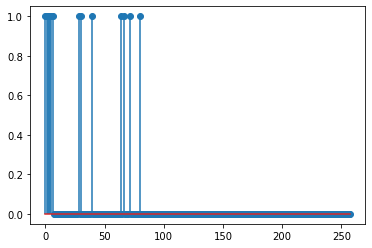

In [28]:
plt.stem(DS["zmean"])

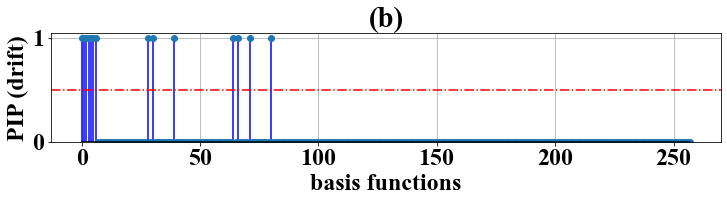

In [32]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 24

figure1=plt.figure(figsize = (12, 2))
xr = np.array(range(nl))
plt.stem(xr,DS['zmean'], use_line_collection = True, linefmt='blue', basefmt="k")
plt.axhline(y= 0.5, color='r', linestyle='-.')
plt.xlabel('basis functions',fontweight='bold')
plt.ylabel('PIP (drift)', fontweight='bold');
plt.title('(b)', fontweight='bold')
plt.grid(True); plt.ylim(0,1.05)
plt.xticks(fontweight='bold'); plt.yticks(fontweight='bold');
figure1.savefig('3dof_drift2.png',format='png',dpi=600,bbox_inches='tight')

# Diffusion 2 Equation discovery 

In [1]:
import numpy as np
np.random.seed(1)

"""
A 3 DOF Duffing system excited by random noise
-----------------------------------------------------------
"""
def _3_DOF_Duffing_sys(x1, x2, x3, x4, x5, x6, T):
    # parameters 
    m1, m2, m3 = 1, 1, 1
    c1, c2, c3 = 2, 2, 2
    k1, k2, k3 = 1000, 2000, 3000
    alpha1, alpha2, alpha3 = 100000, 100000, 100000
    sigma1, sigma2, sigma3 = 1, 1, 1
    
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 500 # no. of samples in the run
    
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    y5 = []
    y6 = []
    xz1 = []
    xz2 = []
    xz3 = []
    xzs11 = []
    xzs22 = []
    xzs33 = []
    np.random.seed(4)
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = np.array([x1, x2, x3, x4, x5, x6])
        x = np.vstack(x0)                                                          # Zero initial condition.
        for n in range(len(t)-1):
            
            dW = np.sqrt(dt)*np.random.randn(3)
            dW2 = dW[0]
            dW4 = dW[1]
            dW6 = dW[2]
            
            a1 = x0[1]
            a2 = -(c1/m1)*x0[1]-(k1/m1)*x0[0]-(c2/m1)*(x0[1]-x0[3])-k2*(x0[0]-x0[2])-(alpha1/m1)*(x0[0])**3-(alpha2/m1)*(x0[0]-x0[2])**3
            a3 = x0[3]
            a4 = -(c2/m2)*(x0[3]-x0[1])-(k2/m2)*(x0[2]-x0[0])-(c3/m2)*(x0[3]-x0[5])-k3/m2*(x0[2]-x0[4])-(alpha2/m2)*(x0[2]-x0[0])**3-(alpha3/m2)*(x0[2]-x0[4])**3
            a5 = x0[5]
            a6 = -(c3/m3)*(x0[5]-x0[3])-(k3/m3)*(x0[4]-x0[2])-(alpha3/m3)*(x0[4]-x0[2])**3
            b2 = (sigma1/m1)
            b4 = (sigma2/m2)
            b6 = (sigma3/m3)

            sol1 = x0[0] + a1*dt 
            sol2 = x0[1] + a2*dt + b2*dW2
            sol3 = x0[2] + a3*dt 
            sol4 = x0[3] + a4*dt + b4*dW4
            sol5 = x0[4] + a5*dt 
            sol6 = x0[5] + a6*dt + b6*dW6
            
            x0 = np.array([sol1, sol2, sol3, sol4, sol5, sol6])
            x = np.column_stack((x, x0))
            
        y1.append(x[0,:])
        y2.append(x[1,:])
        y3.append(x[2,:])
        y4.append(x[3,:])
        y5.append(x[4,:])
        y6.append(x[5,:])
        
        zint1 = x[1,0:-1]
        xfinal1 = x[1,1:] 
        xmz1 = (xfinal1 - zint1) # 'x(t)-z' vector
        
        zint2 = x[3, 0:-1]
        xfinal2 = x[3, 1:] 
        xmz2 = (xfinal2 - zint2) # 'x2(t)-z2' vector
        
        zint3 = x[5, 0:-1]
        xfinal3 = x[5, 1:] 
        xmz3 = (xfinal3 - zint3) # 'x2(t)-z2' vector
        
        xz1.append(xmz1)
        xz2.append(xmz2)
        xz3.append(xmz3)
        
        xmzsq11 = np.multiply(xmz1, xmz1)
        xzs11.append(xmzsq11)
        
        xmzsq22 = np.multiply(xmz2, xmz2)
        xzs22.append(xmzsq22)
        
        xmzsq33 = np.multiply(xmz3, xmz3)
        xzs33.append(xmzsq33)
        
    xz1 = pow(dt,-1)*np.mean(np.array(xz1), axis = 0)
    xz2 = pow(dt,-1)*np.mean(np.array(xz2), axis = 0)
    xz3 = pow(dt,-1)*np.mean(np.array(xz3), axis = 0)
    
    xzs11 = pow(dt,-1)*np.mean(np.array(xzs11), axis = 0)
    xzs22 = pow(dt,-1)*np.mean(np.array(xzs22), axis = 0)
    xzs33 = pow(dt,-1)*np.mean(np.array(xzs33), axis = 0) 
    
    y1 = np.array(y1)
    y2 = np.array(y2)
    y3 = np.array(y3)
    y4 = np.array(y4)
    y5 = np.array(y5)
    y6 = np.array(y6)
    
    time = t[0:-1]
    
    return xz1, xz2, xz3, xzs11, xzs22, xzs33, y1, y2, y3, y4, y5, y6, time

In [2]:
import numpy as np
from scipy import linalg as LA
from sklearn.metrics import mean_squared_error as MSE

"""
The Dictionary creation part:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
"""
def library(xt, polyn, harmonic):
    if polyn == 0:
        polyn = 1
    
    # The polynomial is (x1 + x2)^p, with p is the order
    # poly order 0
    ind = 0
    n = len(xt[0])
    D = np.ones([n,1])
    
    if polyn >= 1:
        # poly order 1
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(xt[i,:])
            D = np.append(D, new, axis=1)
    if polyn >= 2: 
        # ploy order 2
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                ind = ind+1
                new = np.multiply(xt[i,:], xt[j,:])
                new = np.vstack(new)
                D = np.append(D, new, axis=1) 
    if polyn >= 3:    
        # ploy order 3
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    ind = ind+1
                    new = np.multiply(np.multiply(xt[i,:], xt[j,:]), xt[k,:])
                    new = np.vstack(new)
                    D = np.append(D, new, axis=1) 
    if polyn >= 4:
        # ploy order 4
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in range(k,len(xt)):
                        ind = ind+1
                        new = np.multiply(np.multiply(xt[i,:], xt[j,:]), xt[k,:])
                        new = np.multiply(new, xt[l,:])
                        new = np.vstack(new)
                        D = np.append(D, new, axis=1) 
    if polyn >= 5:
        # ploy order 5
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in  range(k,len(xt)):
                        for m in  range(l,len(xt)):
                            ind = ind+1
                            new = np.multiply(xt[i,:], xt[j,:])
                            new = np.multiply(new, xt[k,:])
                            new = np.multiply(new, xt[l,:])
                            new = np.multiply(new, xt[m,:])
                            new = np.vstack(new)
                            D = np.append(D, new, axis=1) 
    if polyn >= 6:
        # ploy order 6
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in  range(k,len(xt)):
                        for m in  range(l,len(xt)):
                            for n in  range(m,len(xt)):
                                ind = ind+1
                                new = np.multiply(xt[i,:], xt[j,:])
                                new = np.multiply(new, xt[k,:])
                                new = np.multiply(new, xt[l,:])
                                new = np.multiply(new, xt[m,:])
                                new = np.multiply(new, xt[n,:])
                                new = np.vstack(new)
                                D = np.append(D, new, axis=1) 
    # for the signum or sign operator
    for i in range(len(xt)):
        ind = ind+1
        new = np.vstack(np.sign(xt[i,:]))+0.0001
        D = np.append(D, new, axis=1)
    
    # for the modulus operator
    for i in range(len(xt)):
        ind = ind+1
        new = np.vstack(abs(xt[i,:]))
        D = np.append(D, new, axis=1)
    # for the tensor operator
    for i in range(len(xt)):
        for j in  range(len(xt)):
            ind = ind+1
            new = np.multiply(xt[i,:],abs(xt[j,:]))
            new = np.vstack(new)
            D = np.append(D, new, axis=1)
    if harmonic == 1:
        # for sin(x)
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(np.sin(xt[i,:]))
            D = np.append(D, new, axis=1)
            #  or,
            # ind = ind+1
            # new = np.sin(xt[i,:])
            # D = np.insert(D, ind, new, axis=1)
        # for cos(x)
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(np.cos(xt[i,:]))
            D = np.append(D, new, axis=1)
#     ind = ind+1
    
    # D = D[:, 0:7] 
    ind = len(D[0])
    return D, ind

In [3]:
import numpy as np

T = 1
# Response generation: 
x1, x2, x3, x4, x5, x6 = 0.00001, 0, 0.00001, 0, 0.00001, 0                                # initial displacement for 3dof
xdrift1, xdrift2, xdrift3, xdiff11, xdiff22, xdiff33, y1, y2, y3, y4, y5, y6, t_eval = _3_DOF_Duffing_sys(x1, x2, x3, x4, x5, x6, T)

# Expected Dictionary Creation:
# Expected Dictionary Creation:
libr = []
for j in range(len(y1)):
    data = np.row_stack((y1[j,0:-1], y2[j,0:-1], y3[j,0:-1], y4[j,0:-1], y5[j,0:-1], y6[j,0:-1]))
    Dtemp, nl = library(data, 4, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)
xdts = xdiff22

In [4]:
D=Dictionary

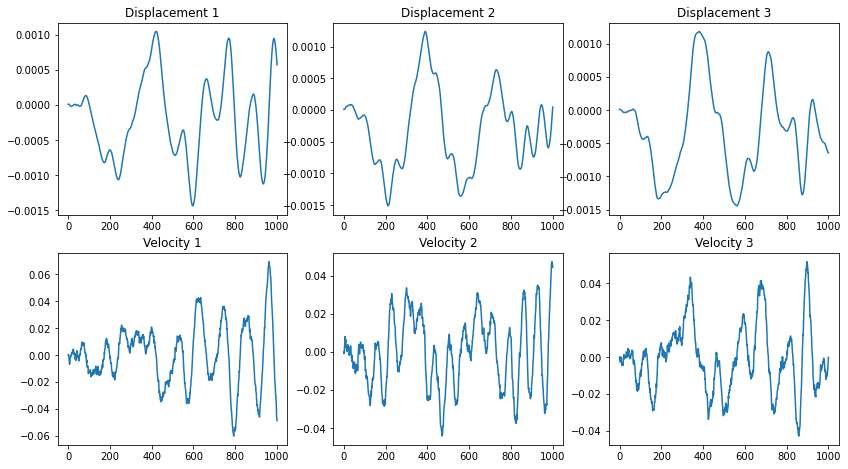

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,12))
plt.subplot(3,3,1)
plt.plot(np.mean((y1), axis=0))
plt.title('Displacement 1')
plt.subplot(3,3,2)
plt.plot(np.mean((y3), axis=0))
plt.title('Displacement 2')
plt.subplot(3,3,3)
plt.plot(np.mean((y5), axis=0))
plt.title('Displacement 3')
plt.subplot(3,3,4)
plt.plot(np.mean((y2), axis=0))
plt.title('Velocity 1')
plt.subplot(3,3,5)
plt.plot(np.mean((y4), axis=0))
plt.title('Velocity 2')
plt.subplot(3,3,6)
plt.plot(np.mean((y6), axis=0))
plt.title('Velocity 3')

plt.show()

In [7]:
Dict = D.reshape(-1,order='F')
Dict.shape

(258000,)

In [8]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[4.0],[9.0],[14.0],[22.0],[23.0],[24.0],[25.0],[26.0],[28.0],[42.0],[44.0],[64.0],[73.0],[85.0],[87.0],[90.0],[103.0],[107.0],[108.0],[122.0],[134.0],[141.0],[147.0],[152.0],[156.0],[176.0],[210.0],[216.0],[221.0],[229.0]]), 'Value': matlab.double([[1.000456750046443],[58.5971056023459],[64.80428090271339],[0.5340828620346918],[-41.363640433216034],[-1.5023156532154662],[-1.8085290682880406],[8.60932632474435],[3230.830276181296],[2.5700479704947],[-105256.73179669642],[44.590694571239304],[-0.08542543200812691],[-142.3843965632333],[17416946.04993008],[-19318224.53420256],[78062.80162962351],[242362.54831728412],[9528.782480820195],[39.59357656344687],[31069.312534636712],[-92445.44318529715],[0.09033398024468824],[27.025041891780646],[-1.8730574487122402],[35364.02349578411],[2216985.493399953],[0.7449515844969802],[0.10700535173725954],[-14.524860076637292],[50.17731771152181]])}


In [9]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
d

[1.000456750046443,
 58.5971056023459,
 64.80428090271339,
 0.5340828620346918,
 -41.363640433216034,
 -1.5023156532154662,
 -1.8085290682880406,
 8.60932632474435,
 3230.830276181296,
 2.5700479704947,
 -105256.73179669642,
 44.590694571239304,
 -0.08542543200812691,
 -142.3843965632333,
 17416946.04993008,
 -19318224.53420256,
 78062.80162962351,
 242362.54831728412,
 9528.782480820195,
 39.59357656344687,
 31069.312534636712,
 -92445.44318529715,
 0.09033398024468824,
 27.025041891780646,
 -1.8730574487122402,
 35364.02349578411,
 2216985.493399953,
 0.7449515844969802,
 0.10700535173725954,
 -14.524860076637292,
 50.17731771152181]

In [10]:
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
b

[0,
 3,
 8,
 13,
 21,
 22,
 23,
 24,
 25,
 27,
 41,
 43,
 63,
 72,
 84,
 86,
 89,
 102,
 106,
 107,
 121,
 133,
 140,
 146,
 151,
 155,
 175,
 209,
 215,
 220,
 228]

In [11]:
initz0_1 = np.zeros(D.shape[1])
for i in b:
    initz0_1[i] = 1
    
initz0_1

array([1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0.

In [12]:
import warnings
import math
import numpy as np
import scipy as sp
import sympy as smp
from scipy import stats
from numpy import linalg as la
import matplotlib.pyplot as plt
from numpy.random import gamma
from scipy.special import loggamma

def Variational_Bayes_Code(X, y, initz0, tol, verbosity):

    if (len(X) == 0 or len(y) == 0):
        raise Exception('X and or y is missing')
        
    if (len(X) != len(y)):
        raise Exception('Number of observations do not match')
        
    # X = stats.zscore(X, ddof = 1)         
    # X = np.c_[np.ones(len(X)),X]
    # X = np.c_[np.ones(len(X)),X]          
    # y = y - np.mean(y)
    N = len(X)
    # Prior parameters of noise variance (Inverse Gamma dist)
    A = 1e-4
    B = 1e-4
    vs = 10
    tau0 = 1000
    
    if (len(initz0) == 0):
        raise Exception('No initial value of z found')
    else:
        p0 = expit(-0.5*(np.sqrt(N)))       
        
        # Adding the intercept indicator variable (slightly less than 1 to prevent log(0) values) 
        # initz = np.hstack((1,initz0))  
        initz = initz0

        DS,LLcvg  = run_VB2(X, y, vs, A, B, tau0, p0, initz, tol, verbosity)    
        # This is function which will come first
        
    out_vb   = DS
    a = DS['zmean'] > 0.5
    count = 0
    modelIdx = []
    for i in a:
        if i == True:
            modelIdx.append(count)
        count += 1
            
    modelIdx = np.setdiff1d(modelIdx,0)
    out_vb['modelIdx'] = modelIdx-1
    out_vb['Zmed'] = DS['zmean'][modelIdx]
    out_vb['Wsel'] = DS['wmean'][modelIdx]
    out_vb['Wcov'] = DS['wCOV'][modelIdx, modelIdx]
    out_vb['sig2'] = DS['sig2']
    
    return out_vb

DS = {}
def run_VB2(Xc, yc, vs, A, B, tau0, p0, initz, tol, verbosity):
    """This function is the implementation of VB from John T. Ormerod paper (2014)
       This implementation uses slab scaling by noise variance
       vs    : treated as a constant
       A,B   : constants of the IG prior over noise variance
       tau0  : Expected value of (sigma^{-2})
       p0    : inclusion probablility
       initz : Initial value of z
       Xc    : Centered and standardized dictionary except the first column
       yc    : Centered observations """
    
    Lambda    = logit(p0)
    iter_     = 0
    max_iter  = 100
    LL        = np.zeros(max_iter)        
    zm        = np.reshape(initz,(-1))            
    taum      = tau0                      
    invVs     = 1/vs
    
    X = Xc
    y = yc
    XtX = (X.T) @ X
    XtX = 0.5*(XtX + (XtX).T)
    Xty = (X.T) @ y                 
    yty = (y.T) @ y

    eyep = np.eye(len(XtX))
    [N,p] = X.shape
    allidx = np.arange(p)
    zm[0] = 1                                                                   # Always include the intercept 
    Abar    = (A + 0.5*N + 0.5*p)
    converged = 0
    
    while (converged==0):
        if (iter_==100):
            break
        
        Zm       = np.diag(zm)
        Omg      = (np.reshape(zm,(-1,1)) @ np.reshape(zm,(1,-1))) + (Zm @ (eyep-Zm))
        # Update the mean and covariance of the coefficients given mean of z
        term1    = XtX * Omg                                                       # elementwisw multiplication
        invSigma = taum * (term1 + invVs * eyep)
        invSigma = 0.5*(invSigma + invSigma.T)                                     # symmetric
        Sigma    = la.inv(invSigma) @ eyep
        mu       = taum * (Sigma @ Zm @ Xty)                                       # @ ---> matrix multiplication
        
        # Update tau related to sigma
        term2    = 2 * Xty @ Zm @ mu
        term3    =  np.reshape(mu,(len(initz0),1)) @ np.reshape(mu,(1,len(initz0)))+ Sigma
        term4    = yty - term2 + np.trace((term1 + invVs * eyep) @ term3)    
        s        = B + 0.5*term4
        
        if s<0:
            warnings.warn('s turned out be less than 0. Taking absolute value')
            s = B + 0.5*abs(term4)
        
        taum     = Abar / s
        zstr   = zm

        order   = np.setdiff1d(np.random.permutation(p), 0, assume_unique=True)
        for j in order: 
            muj     = mu[j]                            
            sigmaj  = Sigma[j,j]
            
            remidx  = np.setdiff1d(allidx,j)
            mu_j    = mu[remidx]
            Sigma_jj= Sigma[remidx,j]
            etaj    = (Lambda - 0.5 * taum * ((muj**2 + sigmaj) * XtX[j,j]) 
                       + taum * np.reshape(X[:,j],(1,-1)) @ (np.reshape(y,(-1,1))*muj 
                        -X[:,remidx] @ np.diag(zstr[remidx]) @ ((mu_j * muj + Sigma_jj).reshape(-1,1))))
            zstr[j] = expit(etaj)
            
        zm = zstr
        
        # Calculate marginal log-likelihood
        
        LL[iter_] = ( 0.5*p 
                    - 0.5*N*np.log(2*np.pi) 
                    + 0.5*p*np.log(invVs) 
                    + A*np.log(B)
                    - loggamma(A)
                    + loggamma(Abar) 
                    - Abar*np.log(s)
                    + 0.5*np.log(la.det(Sigma))
                    + np.nansum(zm*(np.log(p0) - np.log(zm))) 
                    + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
        
        if(verbosity):
            print(f'Iteration = {iter_}  log(Likelihood) = {LL[iter_]}')
        
        if(iter_>1):
            cvg = LL[iter_] - LL[iter_-1]
            
            if (cvg < 0 and verbosity):
                print('OOPS!  log(like) decreasing!!')
            elif (cvg<tol or iter_> max_iter):
                converged = 1
                LL = LL[0:iter_]
                
        iter_    = iter_ + 1
    DS['zmean'] = zm
    DS['wmean'] = mu
    DS['wCOV'] = Sigma
    DS['sig2'] = 1/taum
    LLcvg    = LL[-1]
    return DS, LLcvg
    
def logit(C):
    logitC = np.log(C) - np.log(1-C)
    return logitC

def expit(C):
    expitC = 1./(1 + np.exp(-C))
    return expitC

In [13]:
tol = 0.0001
verbosity = True
initz0 = initz0_1
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 

C:\Users\USER\AppData\Local\Temp/ipykernel_12828/3512855728.py:145: RuntimeWarning: divide by zero encountered in log
  + 0.5*np.log(la.det(Sigma))
C:\Users\USER\AppData\Local\Temp/ipykernel_12828/3512855728.py:147: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_12828/3512855728.py:147: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))


Iteration = 0  log(Likelihood) = -inf


C:\Users\USER\AppData\Local\Temp/ipykernel_12828/3512855728.py:174: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\USER\AppData\Local\Temp/ipykernel_12828/3512855728.py:146: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_12828/3512855728.py:146: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


Iteration = 1  log(Likelihood) = -80.52515505893953
Iteration = 2  log(Likelihood) = -78.13085092413655
Iteration = 3  log(Likelihood) = -78.04392875503514
Iteration = 4  log(Likelihood) = -78.04037307054956
Iteration = 5  log(Likelihood) = -78.04022434996288
Iteration = 6  log(Likelihood) = -78.0402181010909
{'zmean': array([1.00000000e+000, 1.35634745e-007, 1.08801266e-008, 1.35563010e-007,
       2.49408746e-008, 1.35506782e-007, 2.42666068e-008, 1.35856344e-007,
       1.35802534e-007, 1.35861673e-007, 1.35768276e-007, 1.35856409e-007,
       1.35714503e-007, 1.00000000e+000, 1.35689150e-007, 3.76053648e-027,
       1.35752715e-007, 6.96299998e-014, 1.35796952e-007, 1.35623437e-007,
       1.35816883e-007, 1.35660318e-007, 1.00000000e+000, 1.35513670e-007,
       2.97088653e-048, 1.35758434e-007, 1.35623473e-007, 1.00000000e+000,
       1.35894303e-007, 1.35894232e-007, 1.35894303e-007, 1.35894245e-007,
       1.35894303e-007, 1.35894204e-007, 1.35796207e-007, 1.35894250e-007,
    

In [16]:
mut1 = DS['wmean']
sigt = DS['wCOV']
DS['zmean'][np.where(DS['zmean']<0.5)] = 0
mut1[np.where(DS['zmean']<0.5)] = 0
DS['zmean'][np.where(np.diag(sigt)>0.005)] = 0
mut1[np.where(np.diag(sigt)>0.05)] = 0
DS['wmean'][np.where(DS['zmean']==0)] = 0

<StemContainer object of 3 artists>

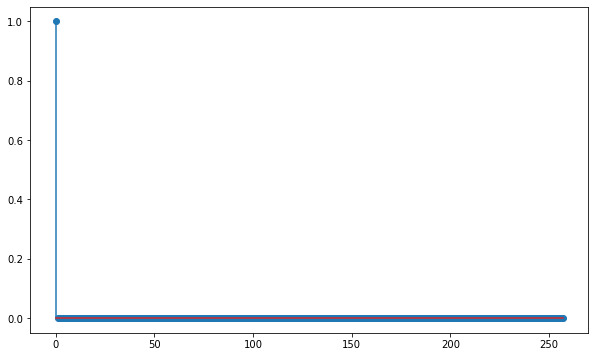

In [17]:
plt.figure(figsize=(10,6))
plt.stem(DS['zmean'])

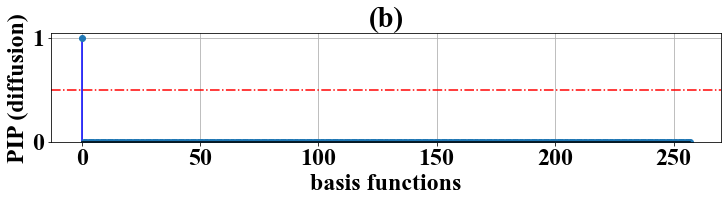

In [18]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 24

figure1=plt.figure(figsize = (12, 2))
xr = np.array(range(nl))
plt.stem(xr,DS['zmean'], use_line_collection = True, linefmt='blue', basefmt="k")
plt.axhline(y= 0.5, color='r', linestyle='-.')
plt.title('(b)', fontweight='bold')
plt.xlabel('basis functions',fontweight='bold')
plt.ylabel('PIP (diffusion)', fontweight='bold');
plt.grid(True); plt.ylim(0,1.05)
plt.xticks(fontweight='bold'); plt.yticks(fontweight='bold');
figure1.savefig('3dof_diff2.png',format='png',dpi=600,bbox_inches='tight')

In [20]:
np.sqrt(DS['wmean'])

array([0.99310203, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Drift 3 Equation discovery 

In [1]:
import numpy as np
from scipy import linalg as LA
from sklearn.metrics import mean_squared_error as MSE

"""
The Dictionary creation part:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
"""
def library(xt, polyn, harmonic):
    if polyn == 0:
        polyn = 1
    
    # The polynomial is (x1 + x2)^p, with p is the order
    # poly order 0
    ind = 0
    n = len(xt[0])
    D = np.ones([n,1])
    
    if polyn >= 1:
        # poly order 1
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(xt[i,:])
            D = np.append(D, new, axis=1)
    if polyn >= 2: 
        # ploy order 2
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                ind = ind+1
                new = np.multiply(xt[i,:], xt[j,:])
                new = np.vstack(new)
                D = np.append(D, new, axis=1) 
    if polyn >= 3:    
        # ploy order 3
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    ind = ind+1
                    new = np.multiply(np.multiply(xt[i,:], xt[j,:]), xt[k,:])
                    new = np.vstack(new)
                    D = np.append(D, new, axis=1) 
    if polyn >= 4:
        # ploy order 4
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in range(k,len(xt)):
                        ind = ind+1
                        new = np.multiply(np.multiply(xt[i,:], xt[j,:]), xt[k,:])
                        new = np.multiply(new, xt[l,:])
                        new = np.vstack(new)
                        D = np.append(D, new, axis=1) 
    if polyn >= 5:
        # ploy order 5
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in  range(k,len(xt)):
                        for m in  range(l,len(xt)):
                            ind = ind+1
                            new = np.multiply(xt[i,:], xt[j,:])
                            new = np.multiply(new, xt[k,:])
                            new = np.multiply(new, xt[l,:])
                            new = np.multiply(new, xt[m,:])
                            new = np.vstack(new)
                            D = np.append(D, new, axis=1) 
    if polyn >= 6:
        # ploy order 6
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in  range(k,len(xt)):
                        for m in  range(l,len(xt)):
                            for n in  range(m,len(xt)):
                                ind = ind+1
                                new = np.multiply(xt[i,:], xt[j,:])
                                new = np.multiply(new, xt[k,:])
                                new = np.multiply(new, xt[l,:])
                                new = np.multiply(new, xt[m,:])
                                new = np.multiply(new, xt[n,:])
                                new = np.vstack(new)
                                D = np.append(D, new, axis=1) 
    # for the signum or sign operator
    for i in range(len(xt)):
        ind = ind+1
        new = np.vstack(np.sign(xt[i,:]))+0.0001
        D = np.append(D, new, axis=1)
    
    # for the modulus operator
    for i in range(len(xt)):
        ind = ind+1
        new = np.vstack(abs(xt[i,:]))
        D = np.append(D, new, axis=1)
    # for the tensor operator
    for i in range(len(xt)):
        for j in  range(len(xt)):
            ind = ind+1
            new = np.multiply(xt[i,:],abs(xt[j,:]))
            new = np.vstack(new)
            D = np.append(D, new, axis=1)
    if harmonic == 1:
        # for sin(x)
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(np.sin(xt[i,:]))
            D = np.append(D, new, axis=1)
            #  or,
            # ind = ind+1
            # new = np.sin(xt[i,:])
            # D = np.insert(D, ind, new, axis=1)
        # for cos(x)
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(np.cos(xt[i,:]))
            D = np.append(D, new, axis=1)
#     ind = ind+1
    
    # D = D[:, 0:7] 
    ind = len(D[0])
    return D, ind

In [2]:
import numpy as np

"""
A 3 DOF Duffing Van der pol system excited by random noise
-----------------------------------------------------------
"""
def _3_DOF_Duffing_sys(x1, x2, x3, x4, x5, x6, T):
    # parameters 
    m1, m2, m3 = 1, 1, 1
    c1, c2, c3 = 2, 2, 2
    k1, k2, k3 = 1000, 2000, 3000
    alpha1, alpha2, alpha3 = 100000, 100000, 100000
    sigma1, sigma2, sigma3 = 1, 1, 1 
    
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 500 # no. of samples in the run
    
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    y5 = []
    y6 = []
    xz1 = []
    xz2 = []
    xz3 = []
    xzs11 = []
    xzs22 = []
    xzs33 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = np.array([x1, x2, x3, x4, x5, x6])
        x = np.vstack(x0)                                                          
        for n in range(len(t)-1):
            
            dW = np.sqrt(dt)*np.random.randn(3)
            dW2 = dW[0]
            dW4 = dW[1]
            dW6 = dW[2]
            
            a1 = x0[1]
            a2 = -(c1/m1)*x0[1]-(k1/m1)*x0[0]-(c2/m1)*(x0[1]-x0[3])-k2*(x0[0]-x0[2])-(alpha1/m1)*(x0[0])**3-(alpha2/m1)*(x0[0]-x0[2])**3
            a3 = x0[3]
            a4 = -(c2/m2)*(x0[3]-x0[1])-(k2/m2)*(x0[2]-x0[0])-(c3/m2)*(x0[3]-x0[5])-k3/m2*(x0[2]-x0[4])-(alpha2/m2)*(x0[2]-x0[0])**3-(alpha3/m2)*(x0[2]-x0[4])**3
            a5 = x0[5]
            a6 = -(c3/m3)*(x0[5]-x0[3])-(k3/m3)*(x0[4]-x0[2])-(alpha3/m3)*(x0[4]-x0[2])**3
            b2 = (sigma1/m1)*x0[0]
            b4 = (sigma2/m2)*x0[2]
            b6 = (sigma3/m3)*x0[4]

            sol1 = x0[0] + a1*dt 
            sol2 = x0[1] + a2*dt + b2*dW2
            sol3 = x0[2] + a3*dt 
            sol4 = x0[3] + a4*dt + b4*dW4
            sol5 = x0[4] + a5*dt 
            sol6 = x0[5] + a6*dt + b6*dW6
            
            x0 = np.array([sol1, sol2, sol3, sol4, sol5, sol6])
            x = np.column_stack((x, x0))
            
        y1.append(x[0,:])
        y2.append(x[1,:])
        y3.append(x[2,:])
        y4.append(x[3,:])
        y5.append(x[4,:])
        y6.append(x[5,:])
        
        zint1 = x[1,0:-1]
        xfinal1 = x[1,1:] 
        xmz1 = (xfinal1 - zint1) # 'x(t)-z' vector
        
        zint2 = x[3, 0:-1]
        xfinal2 = x[3, 1:] 
        xmz2 = (xfinal2 - zint2) # 'x2(t)-z2' vector
        
        zint3 = x[5, 0:-1]
        xfinal3 = x[5, 1:] 
        xmz3 = (xfinal3 - zint3) # 'x2(t)-z2' vector
        
        xz1.append(xmz1)
        xz2.append(xmz2)
        xz3.append(xmz3)
        
        xmzsq11 = np.multiply(xmz1, xmz1)
        xzs11.append(xmzsq11)
        
        xmzsq22 = np.multiply(xmz2, xmz2)
        xzs22.append(xmzsq22)
        
        xmzsq33 = np.multiply(xmz3, xmz3)
        xzs33.append(xmzsq33)
        
        
    xz1 = pow(dt,-1)*np.mean(np.array(xz1), axis = 0)
    xz2 = pow(dt,-1)*np.mean(np.array(xz2), axis = 0)
    xz3 = pow(dt,-1)*np.mean(np.array(xz3), axis = 0)
    
    xzs11 = pow(dt,-1)*np.mean(np.array(xzs11), axis = 0)
    xzs22 = pow(dt,-1)*np.mean(np.array(xzs22), axis = 0)
    xzs33 = pow(dt,-1)*np.mean(np.array(xzs33), axis = 0) 
    
    y1 = np.array(y1)
    y2 = np.array(y2)
    y3 = np.array(y3)
    y4 = np.array(y4)
    y5 = np.array(y5)
    y6 = np.array(y6)
    
    time = t[0:-1]
    
    return xz1, xz2, xz3, xzs11, xzs22, xzs33, y1, y2, y3, y4, y5, y6, time

In [3]:
T = 1
# Response generation: 
x1, x2, x3, x4, x5, x6 = 0.05, 0, 0.01, 0, 0.01, 0 # initial displacement for 3dof
xdrift1, xdrift2, xdrift3, xdiff11, xdiff22, xdiff33, y1, y2, y3, y4, y5, y6, t_eval = _3_DOF_Duffing_sys(x1, x2, x3, x4, x5, x6, T)

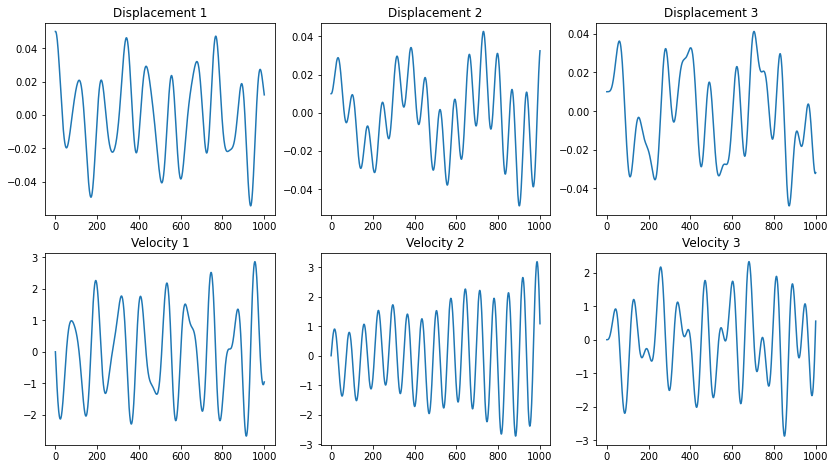

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,12))
plt.subplot(3,3,1)
plt.plot(np.mean((y1), axis=0))
plt.title('Displacement 1')
plt.subplot(3,3,2)
plt.plot(np.mean((y3), axis=0))
plt.title('Displacement 2')
plt.subplot(3,3,3)
plt.plot(np.mean((y5), axis=0))
plt.title('Displacement 3')
plt.subplot(3,3,4)
plt.plot(np.mean((y2), axis=0))
plt.title('Velocity 1')
plt.subplot(3,3,5)
plt.plot(np.mean((y4), axis=0))
plt.title('Velocity 2')
plt.subplot(3,3,6)
plt.plot(np.mean((y6), axis=0))
plt.title('Velocity 3')

plt.show()

In [6]:
# Expected Dictionary Creation:
libr = []
for j in range(len(y1)):
    data = np.row_stack((y1[j,0:-1], y2[j,0:-1], y3[j,0:-1], y4[j,0:-1], y5[j,0:-1], y6[j,0:-1]))
    Dtemp, nl = library(data, 4, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)
xdts = xdrift3

In [7]:
D = Dictionary

In [9]:
Dict = D.reshape(-1, order='F')
Dict.shape

(258000,)

In [10]:
from __future__ import print_function

#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[4.0],[5.0],[6.0],[7.0],[65.0],[67.0],[72.0],[81.0],[82.0],[129.0],[207.0]]), 'Value': matlab.double([[3000.077192910936],[1.9996730554048454],[-3000.1950997798126],[-2.0002145690057307],[99916.4035571285],[-299728.5638154277],[299858.16705842054],[-99822.64845474447],[3.8960591276877334],[58.543253755698736],[-51.208840276672404]])}


In [11]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
d

[3000.077192910936,
 1.9996730554048454,
 -3000.1950997798126,
 -2.0002145690057307,
 99916.4035571285,
 -299728.5638154277,
 299858.16705842054,
 -99822.64845474447,
 3.8960591276877334,
 58.543253755698736,
 -51.208840276672404]

In [12]:
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
b

[3, 4, 5, 6, 64, 66, 71, 80, 81, 128, 206]

In [13]:
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
initz0

array([0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [16]:
D1 = D[:,1:]
D1.shape

(1000, 257)

In [19]:
import warnings
import math
import numpy as np
import scipy as sp
import sympy as smp
from scipy import stats
from numpy import linalg as la
import matplotlib.pyplot as plt
from numpy.random import gamma
from scipy.special import loggamma

def Variational_Bayes_Code(X, y, initz0, tol, verbosity):

    if (len(X) == 0 or len(y) == 0):
        raise Exception('X and or y is missing')
        
    if (len(X) != len(y)):
        raise Exception('Number of observations do not match')
        
    X = stats.zscore(X, ddof = 1)         
    X = np.c_[np.ones(len(X)),X]          
    y = y - np.mean(y)
    N = len(X)
    # Prior parameters of noise variance (Inverse Gamma dist)
    A = 1e-4
    B = 1e-4
    vs = 10
    tau0 = 1000
    
    if (len(initz0) == 0):
        raise Exception('No initial value of z found')
    else:
        p0 = expit(-0.5*(np.sqrt(N)))       
        
        # Adding the intercept indicator variable (slightly less than 1 to prevent log(0) values) 
        initz = np.hstack((1,initz0))   

        DS,LLcvg  = run_VB2(X, y, vs, A, B, tau0, p0, initz, tol, verbosity)    
        # This is function which will come first
        
    out_vb   = DS
    a = DS['zmean'] > 0.5
    count = 0
    modelIdx = []
    for i in a:
        if i == True:
            modelIdx.append(count)
        count += 1
            
    modelIdx = np.setdiff1d(modelIdx,0)
    out_vb['modelIdx'] = modelIdx-1
    out_vb['Zmed'] = DS['zmean'][modelIdx]
    out_vb['Wsel'] = DS['wmean'][modelIdx]
    out_vb['Wcov'] = DS['wCOV'][modelIdx, modelIdx]
    out_vb['sig2'] = DS['sig2']
    
    return out_vb

DS = {}
def run_VB2(Xc, yc, vs, A, B, tau0, p0, initz, tol, verbosity):
    """This function is the implementation of VB from John T. Ormerod paper (2014)
       This implementation uses slab scaling by noise variance
       vs    : treated as a constant
       A,B   : constants of the IG prior over noise variance
       tau0  : Expected value of (sigma^{-2})
       p0    : inclusion probablility
       initz : Initial value of z
       Xc    : Centered and standardized dictionary except the first column
       yc    : Centered observations """
    
    Lambda    = logit(p0)
    iter_     = 0
    max_iter  = 100
    LL        = np.zeros(max_iter)        
    zm        = np.reshape(initz,(-1))            
    taum      = tau0                      
    invVs     = 1/vs
    
    X = Xc
    y = yc
    XtX = (X.T) @ X
    XtX = 0.5*(XtX + (XtX).T)
    Xty = (X.T) @ y                 
    yty = (y.T) @ y

    eyep = np.eye(len(XtX))
    [N,p] = X.shape
    allidx = np.arange(p)
    zm[0] = 1                                                                   # Always include the intercept 
    Abar    = (A + 0.5*N + 0.5*p)
    converged = 0
    
    while (converged==0):
        if (iter_==100):
            break
        
        Zm       = np.diag(zm)
        Omg      = (np.reshape(zm,(-1,1)) @ np.reshape(zm,(1,-1))) + (Zm @ (eyep-Zm))
        # Update the mean and covariance of the coefficients given mean of z
        term1    = XtX * Omg                                                       # elementwisw multiplication
        invSigma = taum * (term1 + invVs * eyep)
        invSigma = 0.5*(invSigma + invSigma.T)                                     # symmetric
        Sigma    = la.inv(invSigma) @ eyep
        mu       = taum * (Sigma @ Zm @ Xty)                                       # @ ---> matrix multiplication
        
        # Update tau related to sigma
        term2    = 2 * Xty @ Zm @ mu
        term3    =  np.reshape(mu,(len(initz0),1)) @ np.reshape(mu,(1,len(initz0)))+ Sigma
        term4    = yty - term2 + np.trace((term1 + invVs * eyep) @ term3)    
        s        = B + 0.5*term4
        
        if s<0:
            warnings.warn('s turned out be less than 0. Taking absolute value')
            s = B + 0.5*abs(term4)
        
        taum     = Abar / s
        zstr   = zm

        order   = np.setdiff1d(np.random.permutation(p), 0, assume_unique=True)
        for j in order: 
            muj     = mu[j]                            
            sigmaj  = Sigma[j,j]
            
            remidx  = np.setdiff1d(allidx,j)
            mu_j    = mu[remidx]
            Sigma_jj= Sigma[remidx,j]
            etaj    = (Lambda - 0.5 * taum * ((muj**2 + sigmaj) * XtX[j,j]) 
                       + taum * np.reshape(X[:,j],(1,-1)) @ (np.reshape(y,(-1,1))*muj 
                        -X[:,remidx] @ np.diag(zstr[remidx]) @ ((mu_j * muj + Sigma_jj).reshape(-1,1))))
            zstr[j] = expit(etaj)
            
        zm = zstr
        
        # Calculate marginal log-likelihood
        
        LL[iter_] = ( 0.5*p 
                    - 0.5*N*np.log(2*np.pi) 
                    + 0.5*p*np.log(invVs) 
                    + A*np.log(B)
                    - loggamma(A)
                    + loggamma(Abar) 
                    - Abar*np.log(s)
                    + 0.5*np.log(la.det(Sigma))
                    + np.nansum(zm*(np.log(p0) - np.log(zm))) 
                    + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
        
        if(verbosity):
            print(f'Iteration = {iter_}  log(Likelihood) = {LL[iter_]}')
        
        if(iter_>1):
            cvg = LL[iter_] - LL[iter_-1]
            
            if (cvg < 0 and verbosity):
                print('OOPS!  log(like) decreasing!!')
            elif (cvg<tol or iter_> max_iter):
                converged = 1
                LL = LL[0:iter_]
                
        iter_    = iter_ + 1
    DS['zmean'] = zm
    DS['wmean'] = mu
    DS['wCOV'] = Sigma
    DS['sig2'] = 1/taum
    LLcvg    = LL[-1]
    return DS, LLcvg
    
def logit(C):
    logitC = np.log(C) - np.log(1-C)
    return logitC

def expit(C):
    expitC = 1./(1 + np.exp(-C))
    return expitC

In [20]:
Dict_std = np.std(D1, axis=0)

In [21]:
Dict_std1 = Dict_std.reshape(1,-1)
Dict_std1.shape

(1, 257)

In [22]:
np.diag(1/Dict_std1)

array([41.41375152])

In [23]:
D2 = D1*np.diag(1/Dict_std1)

In [26]:
initz=initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(D2, xdts, initz, tol, verbosity)

print(DS) 

C:\Users\USER\AppData\Local\Temp/ipykernel_14832/1744024245.py:143: RuntimeWarning: divide by zero encountered in log
  + 0.5*np.log(la.det(Sigma))
C:\Users\USER\AppData\Local\Temp/ipykernel_14832/1744024245.py:145: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_14832/1744024245.py:145: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))


Iteration = 0  log(Likelihood) = -inf


C:\Users\USER\AppData\Local\Temp/ipykernel_14832/1744024245.py:172: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\USER\AppData\Local\Temp/ipykernel_14832/1744024245.py:144: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_14832/1744024245.py:144: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


Iteration = 1  log(Likelihood) = -1508.1340691357107
Iteration = 2  log(Likelihood) = -1505.6521878497051
Iteration = 3  log(Likelihood) = -1505.5623586871773
Iteration = 4  log(Likelihood) = -1505.558685802739
Iteration = 5  log(Likelihood) = -1505.5585321988776
Iteration = 6  log(Likelihood) = -1505.558525739505
{'zmean': array([1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [27]:
for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (Dict_std1))).reshape(-1)[i])

2999.5177971342714
2.003877327157417
-2999.722893353859
-1.9963586504140367
101479.60873415085
-301757.782896836
301463.69638459536
-101138.90462573104


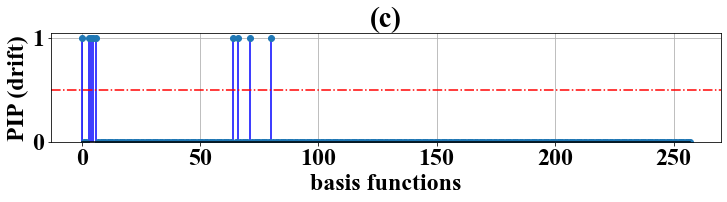

In [37]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 24

figure1=plt.figure(figsize = (12, 2))
xr = np.array(range(nl))
plt.stem(xr,DS['zmean'], use_line_collection = True, linefmt='blue', basefmt="k")
plt.axhline(y= 0.5, color='r', linestyle='-.')
plt.xlabel('basis functions',fontweight='bold')
plt.ylabel('PIP (drift)', fontweight='bold');
plt.title('(c)', fontweight='bold')
plt.grid(True); plt.ylim(0,1.05)
plt.xticks(fontweight='bold'); plt.yticks(fontweight='bold');
figure1.savefig('3dof_drift3.png',format='png',dpi=600,bbox_inches='tight')

# Diffusion 3 Equation discovery

In [1]:
import numpy as np
np.random.seed(1)

"""
A 3 DOF Duffing Van der pol system excited by random noise
-----------------------------------------------------------
"""
def _3_DOF_Duffing_sys(x1, x2, x3, x4, x5, x6, T):
    # parameters 
    m1, m2, m3 = 1, 1, 1
    c1, c2, c3 = 2, 2, 2
    k1, k2, k3 = 1000, 2000, 3000
    alpha1, alpha2, alpha3 = 100000, 100000, 100000
    sigma1, sigma2, sigma3 = 1, 1, 1
    
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 500 # no. of samples in the run
    
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    y5 = []
    y6 = []
    xz1 = []
    xz2 = []
    xz3 = []
    xzs11 = []
    xzs22 = []
    xzs33 = []
    np.random.seed(4)
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = np.array([x1, x2, x3, x4, x5, x6])
        x = np.vstack(x0)                                                          # Zero initial condition.
        for n in range(len(t)-1):
            
            dW = np.sqrt(dt)*np.random.randn(3)
            dW2 = dW[0]
            dW4 = dW[1]
            dW6 = dW[2]
            
            a1 = x0[1]
            a2 = -(c1/m1)*x0[1]-(k1/m1)*x0[0]-(c2/m1)*(x0[1]-x0[3])-k2*(x0[0]-x0[2])-(alpha1/m1)*(x0[0])**3-(alpha2/m1)*(x0[0]-x0[2])**3
            a3 = x0[3]
            a4 = -(c2/m2)*(x0[3]-x0[1])-(k2/m2)*(x0[2]-x0[0])-(c3/m2)*(x0[3]-x0[5])-k3/m2*(x0[2]-x0[4])-(alpha2/m2)*(x0[2]-x0[0])**3-(alpha3/m2)*(x0[2]-x0[4])**3
            a5 = x0[5]
            a6 = -(c3/m3)*(x0[5]-x0[3])-(k3/m3)*(x0[4]-x0[2])-(alpha3/m3)*(x0[4]-x0[2])**3
            b2 = (sigma1/m1)
            b4 = (sigma2/m2)
            b6 = (sigma3/m3)

            sol1 = x0[0] + a1*dt 
            sol2 = x0[1] + a2*dt + b2*dW2
            sol3 = x0[2] + a3*dt 
            sol4 = x0[3] + a4*dt + b4*dW4
            sol5 = x0[4] + a5*dt 
            sol6 = x0[5] + a6*dt + b6*dW6
            
            x0 = np.array([sol1, sol2, sol3, sol4, sol5, sol6])
            x = np.column_stack((x, x0))
            
        y1.append(x[0,:])
        y2.append(x[1,:])
        y3.append(x[2,:])
        y4.append(x[3,:])
        y5.append(x[4,:])
        y6.append(x[5,:])
        
        zint1 = x[1,0:-1]
        xfinal1 = x[1,1:] 
        xmz1 = (xfinal1 - zint1) # 'x(t)-z' vector
        
        zint2 = x[3, 0:-1]
        xfinal2 = x[3, 1:] 
        xmz2 = (xfinal2 - zint2) # 'x2(t)-z2' vector
        
        zint3 = x[5, 0:-1]
        xfinal3 = x[5, 1:] 
        xmz3 = (xfinal3 - zint3) # 'x2(t)-z2' vector
        
        xz1.append(xmz1)
        xz2.append(xmz2)
        xz3.append(xmz3)
        
        xmzsq11 = np.multiply(xmz1, xmz1)
        xzs11.append(xmzsq11)
        
        xmzsq22 = np.multiply(xmz2, xmz2)
        xzs22.append(xmzsq22)
        
        xmzsq33 = np.multiply(xmz3, xmz3)
        xzs33.append(xmzsq33)
        
    xz1 = pow(dt,-1)*np.mean(np.array(xz1), axis = 0)
    xz2 = pow(dt,-1)*np.mean(np.array(xz2), axis = 0)
    xz3 = pow(dt,-1)*np.mean(np.array(xz3), axis = 0)
    
    xzs11 = pow(dt,-1)*np.mean(np.array(xzs11), axis = 0)
    xzs22 = pow(dt,-1)*np.mean(np.array(xzs22), axis = 0)
    xzs33 = pow(dt,-1)*np.mean(np.array(xzs33), axis = 0) 
    
    y1 = np.array(y1)
    y2 = np.array(y2)
    y3 = np.array(y3)
    y4 = np.array(y4)
    y5 = np.array(y5)
    y6 = np.array(y6)
    
    time = t[0:-1]
    
    return xz1, xz2, xz3, xzs11, xzs22, xzs33, y1, y2, y3, y4, y5, y6, time

In [2]:
import numpy as np
from scipy import linalg as LA
from sklearn.metrics import mean_squared_error as MSE

"""
The Dictionary creation part:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
"""
def library(xt, polyn, harmonic):
    if polyn == 0:
        polyn = 1
    
    # The polynomial is (x1 + x2)^p, with p is the order
    # poly order 0
    ind = 0
    n = len(xt[0])
    D = np.ones([n,1])
    
    if polyn >= 1:
        # poly order 1
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(xt[i,:])
            D = np.append(D, new, axis=1)
    if polyn >= 2: 
        # ploy order 2
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                ind = ind+1
                new = np.multiply(xt[i,:], xt[j,:])
                new = np.vstack(new)
                D = np.append(D, new, axis=1) 
    if polyn >= 3:    
        # ploy order 3
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    ind = ind+1
                    new = np.multiply(np.multiply(xt[i,:], xt[j,:]), xt[k,:])
                    new = np.vstack(new)
                    D = np.append(D, new, axis=1) 
    if polyn >= 4:
        # ploy order 4
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in range(k,len(xt)):
                        ind = ind+1
                        new = np.multiply(np.multiply(xt[i,:], xt[j,:]), xt[k,:])
                        new = np.multiply(new, xt[l,:])
                        new = np.vstack(new)
                        D = np.append(D, new, axis=1) 
    if polyn >= 5:
        # ploy order 5
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in  range(k,len(xt)):
                        for m in  range(l,len(xt)):
                            ind = ind+1
                            new = np.multiply(xt[i,:], xt[j,:])
                            new = np.multiply(new, xt[k,:])
                            new = np.multiply(new, xt[l,:])
                            new = np.multiply(new, xt[m,:])
                            new = np.vstack(new)
                            D = np.append(D, new, axis=1) 
    if polyn >= 6:
        # ploy order 6
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in  range(k,len(xt)):
                        for m in  range(l,len(xt)):
                            for n in  range(m,len(xt)):
                                ind = ind+1
                                new = np.multiply(xt[i,:], xt[j,:])
                                new = np.multiply(new, xt[k,:])
                                new = np.multiply(new, xt[l,:])
                                new = np.multiply(new, xt[m,:])
                                new = np.multiply(new, xt[n,:])
                                new = np.vstack(new)
                                D = np.append(D, new, axis=1) 
    # for the signum or sign operator
    for i in range(len(xt)):
        ind = ind+1
        new = np.vstack(np.sign(xt[i,:]))+0.0001
        D = np.append(D, new, axis=1)
    
    # for the modulus operator
    for i in range(len(xt)):
        ind = ind+1
        new = np.vstack(abs(xt[i,:]))
        D = np.append(D, new, axis=1)
    # for the tensor operator
    for i in range(len(xt)):
        for j in  range(len(xt)):
            ind = ind+1
            new = np.multiply(xt[i,:],abs(xt[j,:]))
            new = np.vstack(new)
            D = np.append(D, new, axis=1)
    if harmonic == 1:
        # for sin(x)
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(np.sin(xt[i,:]))
            D = np.append(D, new, axis=1)
            #  or,
            # ind = ind+1
            # new = np.sin(xt[i,:])
            # D = np.insert(D, ind, new, axis=1)
        # for cos(x)
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(np.cos(xt[i,:]))
            D = np.append(D, new, axis=1)
#     ind = ind+1
    
    # D = D[:, 0:7] 
    ind = len(D[0])
    return D, ind

In [3]:
import numpy as np

T = 1
# Response generation: 
# initial displacement for 3dof
x1, x2, x3, x4, x5, x6 = 0.0001, 0, 0.0001, 0, 0.0001, 0
xdrift1, xdrift2, xdrift3, xdiff11, xdiff22, xdiff33, y1, y2, y3, y4, y5, y6, t_eval = _3_DOF_Duffing_sys(x1, x2, x3, x4, x5, x6, T)

# Expected Dictionary Creation:
libr = []
for j in range(len(y1)):
    data = np.row_stack((y1[j,0:-1], y2[j,0:-1], y3[j,0:-1], y4[j,0:-1], y5[j,0:-1], y6[j,0:-1]))
    Dtemp, nl = library(data, 4, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)
xdts = xdiff33

In [4]:
D = Dictionary

In [5]:
D.shape

(1000, 258)

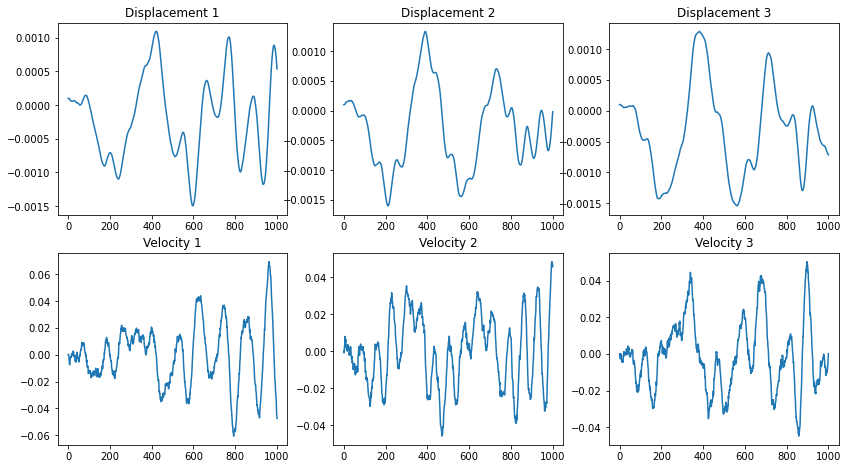

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,12))
plt.subplot(3,3,1)
plt.plot(np.mean((y1), axis=0))
plt.title('Displacement 1')
plt.subplot(3,3,2)
plt.plot(np.mean((y3), axis=0))
plt.title('Displacement 2')
plt.subplot(3,3,3)
plt.plot(np.mean((y5), axis=0))
plt.title('Displacement 3')
plt.subplot(3,3,4)
plt.plot(np.mean((y2), axis=0))
plt.title('Velocity 1')
plt.subplot(3,3,5)
plt.plot(np.mean((y4), axis=0))
plt.title('Velocity 2')
plt.subplot(3,3,6)
plt.plot(np.mean((y6), axis=0))
plt.title('Velocity 3')

plt.show()

In [7]:
Dict = D.reshape(-1,order='F')
Dict.shape

(258000,)

In [8]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[14.0],[25.0],[26.0],[43.0],[56.0],[85.0],[87.0],[105.0],[115.0],[127.0],[133.0],[139.0],[146.0],[147.0],[148.0],[156.0],[170.0],[190.0],[195.0],[200.0],[205.0],[206.0],[209.0],[212.0],[213.0],[214.0],[254.0]]), 'Value': matlab.double([[0.9990486821130179],[1.3797635294622448],[2.6995317101026703],[947.5250633913922],[-249.9277506429656],[-56.71578730003113],[7602305.139170492],[-7157555.988351076],[1430.395368029686],[-3.029186735773401],[-5020.815272191521],[-43.52963348575779],[382.4539486754838],[5943.280654471978],[11.387522455993397],[-4825.593975256931],[29479.40859140462],[-64.90201137069128],[2441.1008157730976],[-33.01633419808613],[20.776689536079253],[0.3895775234082129],[419734.2601957546],[17.852074381664107],[0.14475143755503025],[-0.006486846894910294],[0.020657145069648008],[0.622122665268846]])}


In [9]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
d

[0.9990486821130179,
 1.3797635294622448,
 2.6995317101026703,
 947.5250633913922,
 -249.9277506429656,
 -56.71578730003113,
 7602305.139170492,
 -7157555.988351076,
 1430.395368029686,
 -3.029186735773401,
 -5020.815272191521,
 -43.52963348575779,
 382.4539486754838,
 5943.280654471978,
 11.387522455993397,
 -4825.593975256931,
 29479.40859140462,
 -64.90201137069128,
 2441.1008157730976,
 -33.01633419808613,
 20.776689536079253,
 0.3895775234082129,
 419734.2601957546,
 17.852074381664107,
 0.14475143755503025,
 -0.006486846894910294,
 0.020657145069648008,
 0.622122665268846]

In [10]:
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
b

[0,
 13,
 24,
 25,
 42,
 55,
 84,
 86,
 104,
 114,
 126,
 132,
 138,
 145,
 146,
 147,
 155,
 169,
 189,
 194,
 199,
 204,
 205,
 208,
 211,
 212,
 213,
 253]

In [11]:
initz0_1 = np.zeros(D.shape[1])
for i in b:
    initz0_1[i] = 1
    
initz0_1

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [12]:
import warnings
import math
import numpy as np
import scipy as sp
import sympy as smp
from scipy import stats
from numpy import linalg as la
import matplotlib.pyplot as plt
from numpy.random import gamma
from scipy.special import loggamma

def Variational_Bayes_Code(X, y, initz0, tol, verbosity):

    if (len(X) == 0 or len(y) == 0):
        raise Exception('X and or y is missing')
        
    if (len(X) != len(y)):
        raise Exception('Number of observations do not match')
        
    # X = stats.zscore(X, ddof = 1)         
    # X = np.c_[np.ones(len(X)),X]
    # X = np.c_[np.ones(len(X)),X]          
    # y = y - np.mean(y)
    N = len(X)
    # Prior parameters of noise variance (Inverse Gamma dist)
    A = 1e-4
    B = 1e-4
    vs = 10
    tau0 = 1000
    
    if (len(initz0) == 0):
        raise Exception('No initial value of z found')
    else:
        p0 = expit(-0.5*(np.sqrt(N)))       
        
        # Adding the intercept indicator variable (slightly less than 1 to prevent log(0) values) 
        # initz = np.hstack((1,initz0))  
        initz = initz0

        DS,LLcvg  = run_VB2(X, y, vs, A, B, tau0, p0, initz, tol, verbosity)    
        # This is function which will come first
        
    out_vb   = DS
    a = DS['zmean'] > 0.5
    count = 0
    modelIdx = []
    for i in a:
        if i == True:
            modelIdx.append(count)
        count += 1
            
    modelIdx = np.setdiff1d(modelIdx,0)
    out_vb['modelIdx'] = modelIdx-1
    out_vb['Zmed'] = DS['zmean'][modelIdx]
    out_vb['Wsel'] = DS['wmean'][modelIdx]
    out_vb['Wcov'] = DS['wCOV'][modelIdx, modelIdx]
    out_vb['sig2'] = DS['sig2']
    
    return out_vb

DS = {}
def run_VB2(Xc, yc, vs, A, B, tau0, p0, initz, tol, verbosity):
    """This function is the implementation of VB from John T. Ormerod paper (2014)
       This implementation uses slab scaling by noise variance
       vs    : treated as a constant
       A,B   : constants of the IG prior over noise variance
       tau0  : Expected value of (sigma^{-2})
       p0    : inclusion probablility
       initz : Initial value of z
       Xc    : Centered and standardized dictionary except the first column
       yc    : Centered observations """
    
    Lambda    = logit(p0)
    iter_     = 0
    max_iter  = 100
    LL        = np.zeros(max_iter)        
    zm        = np.reshape(initz,(-1))            
    taum      = tau0                      
    invVs     = 1/vs
    
    X = Xc
    y = yc
    XtX = (X.T) @ X
    XtX = 0.5*(XtX + (XtX).T)
    Xty = (X.T) @ y                 
    yty = (y.T) @ y

    eyep = np.eye(len(XtX))
    [N,p] = X.shape
    allidx = np.arange(p)
    zm[0] = 1                                                                   # Always include the intercept 
    Abar    = (A + 0.5*N + 0.5*p)
    converged = 0
    
    while (converged==0):
        if (iter_==100):
            break
        
        Zm       = np.diag(zm)
        Omg      = (np.reshape(zm,(-1,1)) @ np.reshape(zm,(1,-1))) + (Zm @ (eyep-Zm))
        # Update the mean and covariance of the coefficients given mean of z
        term1    = XtX * Omg                                                       # elementwisw multiplication
        invSigma = taum * (term1 + invVs * eyep)
        invSigma = 0.5*(invSigma + invSigma.T)                                     # symmetric
        Sigma    = la.inv(invSigma) @ eyep
        mu       = taum * (Sigma @ Zm @ Xty)                                       # @ ---> matrix multiplication
        
        # Update tau related to sigma
        term2    = 2 * Xty @ Zm @ mu
        term3    =  np.reshape(mu,(len(initz0),1)) @ np.reshape(mu,(1,len(initz0)))+ Sigma
        term4    = yty - term2 + np.trace((term1 + invVs * eyep) @ term3)    
        s        = B + 0.5*term4
        
        if s<0:
            warnings.warn('s turned out be less than 0. Taking absolute value')
            s = B + 0.5*abs(term4)
        
        taum     = Abar / s
        zstr   = zm

        order   = np.setdiff1d(np.random.permutation(p), 0, assume_unique=True)
        for j in order: 
            muj     = mu[j]                            
            sigmaj  = Sigma[j,j]
            
            remidx  = np.setdiff1d(allidx,j)
            mu_j    = mu[remidx]
            Sigma_jj= Sigma[remidx,j]
            etaj    = (Lambda - 0.5 * taum * ((muj**2 + sigmaj) * XtX[j,j]) 
                       + taum * np.reshape(X[:,j],(1,-1)) @ (np.reshape(y,(-1,1))*muj 
                        -X[:,remidx] @ np.diag(zstr[remidx]) @ ((mu_j * muj + Sigma_jj).reshape(-1,1))))
            zstr[j] = expit(etaj)
            
        zm = zstr
        
        # Calculate marginal log-likelihood
        
        LL[iter_] = ( 0.5*p 
                    - 0.5*N*np.log(2*np.pi) 
                    + 0.5*p*np.log(invVs) 
                    + A*np.log(B)
                    - loggamma(A)
                    + loggamma(Abar) 
                    - Abar*np.log(s)
                    + 0.5*np.log(la.det(Sigma))
                    + np.nansum(zm*(np.log(p0) - np.log(zm))) 
                    + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
        
        if(verbosity):
            print(f'Iteration = {iter_}  log(Likelihood) = {LL[iter_]}')
        
        if(iter_>1):
            cvg = LL[iter_] - LL[iter_-1]
            
            if (cvg < 0 and verbosity):
                print('OOPS!  log(like) decreasing!!')
            elif (cvg<tol or iter_> max_iter):
                converged = 1
                LL = LL[0:iter_]
                
        iter_    = iter_ + 1
    DS['zmean'] = zm
    DS['wmean'] = mu
    DS['wCOV'] = Sigma
    DS['sig2'] = 1/taum
    LLcvg    = LL[-1]
    return DS, LLcvg
    
def logit(C):
    logitC = np.log(C) - np.log(1-C)
    return logitC

def expit(C):
    expitC = 1./(1 + np.exp(-C))
    return expitC

In [13]:
tol = 0.0001
verbosity = True
initz0 = initz0_1
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 

C:\Users\USER\AppData\Local\Temp/ipykernel_20820/3512855728.py:145: RuntimeWarning: divide by zero encountered in log
  + 0.5*np.log(la.det(Sigma))
C:\Users\USER\AppData\Local\Temp/ipykernel_20820/3512855728.py:147: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_20820/3512855728.py:147: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))


Iteration = 0  log(Likelihood) = -inf


C:\Users\USER\AppData\Local\Temp/ipykernel_20820/3512855728.py:174: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\USER\AppData\Local\Temp/ipykernel_20820/3512855728.py:146: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_20820/3512855728.py:146: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


Iteration = 1  log(Likelihood) = 351.63510503654817
Iteration = 2  log(Likelihood) = 354.25502504652803
Iteration = 3  log(Likelihood) = 354.34952476357694
Iteration = 4  log(Likelihood) = 354.35338582408747
Iteration = 5  log(Likelihood) = 354.35354727880275
Iteration = 6  log(Likelihood) = 354.35355406258896
{'zmean': array([1.00000000e+000, 1.35610063e-007, 1.01482691e-008, 1.35516144e-007,
       2.21351240e-008, 1.35453227e-007, 2.16913231e-008, 1.35856335e-007,
       1.35802282e-007, 1.35861662e-007, 1.35768189e-007, 1.35856396e-007,
       1.35714665e-007, 1.00000000e+000, 1.35688702e-007, 3.80690240e-027,
       1.35752303e-007, 6.97203209e-014, 1.35796925e-007, 1.35622972e-007,
       1.35816855e-007, 1.35660428e-007, 0.00000000e+000, 1.35513159e-007,
       1.00000000e+000, 1.35758395e-007, 1.35623495e-007, 9.32803844e-251,
       1.35894303e-007, 1.35894231e-007, 1.35894303e-007, 1.35894245e-007,
       1.35894303e-007, 1.35894204e-007, 1.35794702e-007, 1.35894248e-007,
   

In [16]:
mut1 = DS['wmean']
sigt = DS['wCOV']
DS['zmean'][np.where(DS['zmean']<0.5)] = 0
mut1[np.where(DS['zmean']<0.5)] = 0
DS['zmean'][np.where(np.diag(sigt)>0.01)] = 0
mut1[np.where(np.diag(sigt)>0.05)] = 0
DS['wmean'][np.where(DS['zmean']==0)] = 0

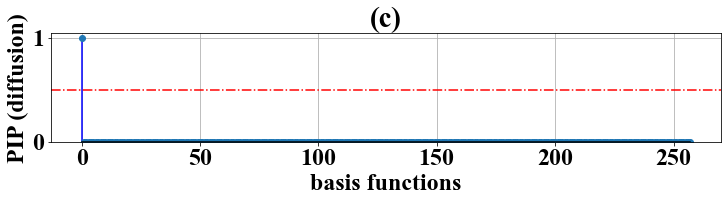

In [18]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 24

figure1=plt.figure(figsize = (12, 2))
xr = np.array(range(nl))
plt.stem(xr,DS['zmean'], use_line_collection = True, linefmt='blue', basefmt="k")
plt.axhline(y= 0.5, color='r', linestyle='-.')
plt.title('(c)', fontweight='bold')
plt.xlabel('basis functions',fontweight='bold')
plt.ylabel('PIP (diffusion)', fontweight='bold');
plt.grid(True); plt.ylim(0,1.05)
plt.xticks(fontweight='bold'); plt.yticks(fontweight='bold');
figure1.savefig('3dof_diff3.png',format='png',dpi=600,bbox_inches='tight')

In [19]:
np.sqrt(DS['wmean'])

array([0.97781871, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# True value prediction (1 to 5000 samples)

In [1]:
import numpy as np
import pickle

Nsamp = 10000
dt = 0.0005
T = 30
t = np.arange(0, T+dt, dt)
dW1 = np.sqrt(dt)*np.random.randn(Nsamp, 60001)
dW2 = np.sqrt(dt)*np.random.randn(Nsamp, 60001)
dW3 = np.sqrt(dt)*np.random.randn(Nsamp, 60001)

In [2]:
dW = [dW1, dW2, dW3]
len(dW)

3

In [3]:
pickle.dump(dW, open('Forcing_term_3DOF_new.p', 'wb'))

In [1]:
import pickle 
import numpy as np

file_data = "Forcing_term_3DOF_new.p"
fileobj_data = open(file_data, 'rb')
Forcing_term = pickle.load(fileobj_data)

dW = np.array(Forcing_term)

In [2]:
dW1 = dW[0]
dW2 = dW[1]
dW3 = dW[2]

In [12]:
import numpy as np

"""
A 3 DOF Duffing Van der pol system excited by random noise
-----------------------------------------------------------
"""
def _3_DOF_Duffing_sys(x1, x2, x3, x4, x5, x6, T):
    # parameters of Duffing oscillator in Equation
    m1, m2, m3 = 1, 1, 1
    c1, c2, c3 = 2, 2, 2
    k1, k2, k3 = 1000, 2000, 3000
    alpha1, alpha2, alpha3 = 100000, 100000, 100000
    sigma1, sigma2, sigma3 = 1, 1, 1 
    
    dt = 0.0005
    t = np.arange(0, T+dt, dt)
    Nsamp = 5000 # no. of samples in the run
  
    
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    y5 = []
    y6 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = np.array([x1, x2, x3, x4, x5, x6])
        x = np.vstack(x0)                                                          # Zero initial condition.
        if ensemble%10==0:
            print(ensemble)
        for n in range(len(t)-1):
            
            a1 = x0[1]
            a2 = -(c1/m1)*x0[1]-(k1/m1)*x0[0]-(c2/m1)*(x0[1]-x0[3])-k2*(x0[0]-x0[2])-(alpha1/m1)*(x0[0])**3-(alpha2/m1)*(x0[0]-x0[2])**3
            a3 = x0[3]
            a4 = -(c2/m2)*(x0[3]-x0[1])-(k2/m2)*(x0[2]-x0[0])-(c3/m2)*(x0[3]-x0[5])-k3/m2*(x0[2]-x0[4])-(alpha2/m2)*(x0[2]-x0[0])**3-(alpha3/m2)*(x0[2]-x0[4])**3
            a5 = x0[5]
            a6 = -(c3/m3)*(x0[5]-x0[3])-(k3/m3)*(x0[4]-x0[2])-(alpha3/m3)*(x0[4]-x0[2])**3
            b2 = (sigma1/m1)
            b4 = (sigma2/m2)
            b6 = (sigma3/m3)

            sol1 = x0[0] + a1*dt 
            sol2 = x0[1] + a2*dt + b2*dW1[ensemble][n]
            sol3 = x0[2] + a3*dt 
            sol4 = x0[3] + a4*dt + b4*dW2[ensemble][n]
            sol5 = x0[4] + a5*dt 
            sol6 = x0[5] + a6*dt + b6*dW3[ensemble][n]
            
            x0 = np.array([sol1, sol2, sol3, sol4, sol5, sol6])
            x = np.column_stack((x, x0))
            
        y1.append(x[0,:])
        y2.append(x[1,:])
        y3.append(x[2,:])
        y4.append(x[3,:])
        y5.append(x[4,:])
        y6.append(x[5,:])
    
    y1 = np.array(y1)
    y2 = np.array(y2)
    y3 = np.array(y3)
    y4 = np.array(y4)
    y5 = np.array(y5)
    y6 = np.array(y6)
    
    
    return y1, y2, y3, y4, y5, y6

In [13]:
T = 30
# Response generation: 
x1, x2, x3, x4, x5, x6 = 0, 0, 0, 0, 0, 0 # initial displacement for 3dof
y1, y2, y3, y4, y5, y6 = _3_DOF_Duffing_sys(x1, x2, x3, x4, x5, x6, T)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
2

In [14]:
output = [y1, y2, y3, y4, y5, y6]

In [15]:
pickle.dump(output, open('Initial_relia_data_3DOF_upto_5000.p', 'wb'))

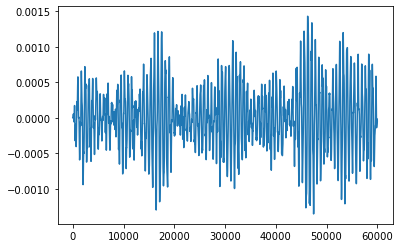

In [16]:
plt.plot(np.mean(y1, axis=0))

# True value prediction (5001 to 10000 samples)

In [1]:
import pickle 
import numpy as np

file_data = "Forcing_term_3DOF_new.p"
fileobj_data = open(file_data, 'rb')
Forcing_term = pickle.load(fileobj_data)

dW = np.array(Forcing_term)

In [2]:
dW1 = dW[0]
dW2 = dW[1]
dW3 = dW[2]

In [3]:
print(dW1.shape)
print(dW2.shape)
print(dW3.shape)

(10000, 60001)
(10000, 60001)
(10000, 60001)


In [4]:
import numpy as np

"""
A 3 DOF Duffing Van der pol system excited by random noise
-----------------------------------------------------------
"""
def _3_DOF_Duffing_sys(x1, x2, x3, x4, x5, x6, T):
    # parameters of Duffing oscillator in Equation
    m1, m2, m3 = 1, 1, 1
    c1, c2, c3 = 2, 2, 2
    k1, k2, k3 = 1000, 2000, 3000
    alpha1, alpha2, alpha3 = 100000, 100000, 100000
    sigma1, sigma2, sigma3 = 1, 1, 1 
    
    dt = 0.0005
    t = np.arange(0, T+dt, dt)
    Nsamp = 5000 # no. of samples in the run
  
    
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    y5 = []
    y6 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = np.array([x1, x2, x3, x4, x5, x6])
        x = np.vstack(x0)                                                          # Zero initial condition.
        if ensemble%10==0:
            print(ensemble)
        for n in range(len(t)-1):
            
            a1 = x0[1]
            a2 = -(c1/m1)*x0[1]-(k1/m1)*x0[0]-(c2/m1)*(x0[1]-x0[3])-k2*(x0[0]-x0[2])-(alpha1/m1)*(x0[0])**3-(alpha2/m1)*(x0[0]-x0[2])**3
            a3 = x0[3]
            a4 = -(c2/m2)*(x0[3]-x0[1])-(k2/m2)*(x0[2]-x0[0])-(c3/m2)*(x0[3]-x0[5])-k3/m2*(x0[2]-x0[4])-(alpha2/m2)*(x0[2]-x0[0])**3-(alpha3/m2)*(x0[2]-x0[4])**3
            a5 = x0[5]
            a6 = -(c3/m3)*(x0[5]-x0[3])-(k3/m3)*(x0[4]-x0[2])-(alpha3/m3)*(x0[4]-x0[2])**3
            b2 = (sigma1/m1)
            b4 = (sigma2/m2)
            b6 = (sigma3/m3)

            sol1 = x0[0] + a1*dt 
            sol2 = x0[1] + a2*dt + b2*dW1[5000+ensemble][n]
            sol3 = x0[2] + a3*dt 
            sol4 = x0[3] + a4*dt + b4*dW2[5000+ensemble][n]
            sol5 = x0[4] + a5*dt 
            sol6 = x0[5] + a6*dt + b6*dW3[5000+ensemble][n]
            
            x0 = np.array([sol1, sol2, sol3, sol4, sol5, sol6])
            x = np.column_stack((x, x0))
            
        y1.append(x[0,:])
        y2.append(x[1,:])
        y3.append(x[2,:])
        y4.append(x[3,:])
        y5.append(x[4,:])
        y6.append(x[5,:])
    
    y1 = np.array(y1)
    y2 = np.array(y2)
    y3 = np.array(y3)
    y4 = np.array(y4)
    y5 = np.array(y5)
    y6 = np.array(y6)
    
    
    return y1, y2, y3, y4, y5, y6

In [5]:
T = 30
# Response generation: 
x1, x2, x3, x4, x5, x6 = 0, 0, 0, 0, 0, 0 # initial displacement for 3dof
y1, y2, y3, y4, y5, y6 = _3_DOF_Duffing_sys(x1, x2, x3, x4, x5, x6, T)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
2

In [6]:
output = [y1, y2, y3, y4, y5, y6]

In [7]:
pickle.dump(output, open('Initial_relia_data_3DOF_upto_10000.p', 'wb'))

# Estimated value prediction (1 to 5000 samples)

In [1]:
import pickle 
import numpy as np

file_data = "Forcing_term_3DOF_new.p"
fileobj_data = open(file_data, 'rb')
Forcing_term = pickle.load(fileobj_data)

dW = np.array(Forcing_term)

In [2]:
dW1 = dW[0]
dW2 = dW[1]
dW3 = dW[2]

In [4]:
import numpy as np

"""
A 3 DOF Duffing Van der pol system excited by random noise
-----------------------------------------------------------
"""
def _3_DOF_Duffing_sys(x1, x2, x3, x4, x5, x6, T):
    # parameters of Duffing oscillator in Equation
    m1, m2, m3 = 1, 1, 1
    c1, c2, c3 = 2.0003, 2.0004, 2.00015
    k1, k2, k3 = 999.7, 2000.42, 2999.95
    alpha1, alpha2, alpha3 = 100035, 100180, 100134.11
    sigma1, sigma2, sigma3 = 1.15503231, 0.99310203, 0.97781871 
    
    dt = 0.0005
    t = np.arange(0, T+dt, dt)
    Nsamp = 5000 # no. of samples in the run
  
    
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    y5 = []
    y6 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = np.array([x1, x2, x3, x4, x5, x6])
        x = np.vstack(x0)                                                          # Zero initial condition.
        if ensemble%10==0:
            print(ensemble)
        for n in range(len(t)-1):
            
            a1 = x0[1]
            a2 = -(c1/m1)*x0[1]-(k1/m1)*x0[0]-(c2/m1)*(x0[1]-x0[3])-k2*(x0[0]-x0[2])-(alpha1/m1)*(x0[0])**3-(alpha2/m1)*(x0[0]-x0[2])**3
            a3 = x0[3]
            a4 = -(c2/m2)*(x0[3]-x0[1])-(k2/m2)*(x0[2]-x0[0])-(c3/m2)*(x0[3]-x0[5])-k3/m2*(x0[2]-x0[4])-(alpha2/m2)*(x0[2]-x0[0])**3-(alpha3/m2)*(x0[2]-x0[4])**3
            a5 = x0[5]
            a6 = -(c3/m3)*(x0[5]-x0[3])-(k3/m3)*(x0[4]-x0[2])-(alpha3/m3)*(x0[4]-x0[2])**3
            b2 = (sigma1/m1)
            b4 = (sigma2/m2)
            b6 = (sigma3/m3)

            sol1 = x0[0] + a1*dt 
            sol2 = x0[1] + a2*dt + b2*dW1[ensemble][n]
            sol3 = x0[2] + a3*dt 
            sol4 = x0[3] + a4*dt + b4*dW2[ensemble][n]
            sol5 = x0[4] + a5*dt 
            sol6 = x0[5] + a6*dt + b6*dW3[ensemble][n]
            
            x0 = np.array([sol1, sol2, sol3, sol4, sol5, sol6])
            x = np.column_stack((x, x0))
            
        y1.append(x[0,:])
        y2.append(x[1,:])
        y3.append(x[2,:])
        y4.append(x[3,:])
        y5.append(x[4,:])
        y6.append(x[5,:])
    
    y1 = np.array(y1)
    y2 = np.array(y2)
    y3 = np.array(y3)
    y4 = np.array(y4)
    y5 = np.array(y5)
    y6 = np.array(y6)
    
    
    return y1, y2, y3, y4, y5, y6

In [5]:
T = 30
# Response generation: 
x1, x2, x3, x4, x5, x6 = 0, 0, 0, 0, 0, 0 # initial displacement for 3dof
y1, y2, y3, y4, y5, y6 = _3_DOF_Duffing_sys(x1, x2, x3, x4, x5, x6, T)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
2

In [6]:
output = [y1, y2, y3, y4, y5, y6]

In [7]:
pickle.dump(output, open('Final_relia_data_3DOF_upto_5000.p', 'wb'))

# Estimated value prediction (5001 to 10000 samples)

In [1]:
import pickle 
import numpy as np

file_data = "Forcing_term_3DOF_new.p"
fileobj_data = open(file_data, 'rb')
Forcing_term = pickle.load(fileobj_data)

dW = np.array(Forcing_term)

In [2]:
dW1 = dW[0]
dW2 = dW[1]
dW3 = dW[2]

In [4]:
import numpy as np

"""
A 3 DOF Duffing Van der pol system excited by random noise
-----------------------------------------------------------
"""
def _3_DOF_Duffing_sys(x1, x2, x3, x4, x5, x6, T):
    # parameters of Duffing oscillator in Equation
    m1, m2, m3 = 1, 1, 1
    c1, c2, c3 = 2.0003, 2.0004, 2.00015
    k1, k2, k3 = 999.7, 2000.42, 2999.95
    alpha1, alpha2, alpha3 = 100035, 100180, 100134.11
    sigma1, sigma2, sigma3 = 1, 1, 1 
    
    dt = 0.0005
    t = np.arange(0, T+dt, dt)
    Nsamp = 5000 # no. of samples in the run
  
    
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    y5 = []
    y6 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = np.array([x1, x2, x3, x4, x5, x6])
        x = np.vstack(x0)                                                          # Zero initial condition.
        if ensemble%10==0:
            print(ensemble)
        for n in range(len(t)-1):
            
            a1 = x0[1]
            a2 = -(c1/m1)*x0[1]-(k1/m1)*x0[0]-(c2/m1)*(x0[1]-x0[3])-k2*(x0[0]-x0[2])-(alpha1/m1)*(x0[0])**3-(alpha2/m1)*(x0[0]-x0[2])**3
            a3 = x0[3]
            a4 = -(c2/m2)*(x0[3]-x0[1])-(k2/m2)*(x0[2]-x0[0])-(c3/m2)*(x0[3]-x0[5])-k3/m2*(x0[2]-x0[4])-(alpha2/m2)*(x0[2]-x0[0])**3-(alpha3/m2)*(x0[2]-x0[4])**3
            a5 = x0[5]
            a6 = -(c3/m3)*(x0[5]-x0[3])-(k3/m3)*(x0[4]-x0[2])-(alpha3/m3)*(x0[4]-x0[2])**3
            b2 = (sigma1/m1)
            b4 = (sigma2/m2)
            b6 = (sigma3/m3)

            sol1 = x0[0] + a1*dt 
            sol2 = x0[1] + a2*dt + b2*dW1[5000+ensemble][n]
            sol3 = x0[2] + a3*dt 
            sol4 = x0[3] + a4*dt + b4*dW2[5000+ensemble][n]
            sol5 = x0[4] + a5*dt 
            sol6 = x0[5] + a6*dt + b6*dW3[5000+ensemble][n]
            
            x0 = np.array([sol1, sol2, sol3, sol4, sol5, sol6])
            x = np.column_stack((x, x0))
            
        y1.append(x[0,:])
        y2.append(x[1,:])
        y3.append(x[2,:])
        y4.append(x[3,:])
        y5.append(x[4,:])
        y6.append(x[5,:])
    
    y1 = np.array(y1)
    y2 = np.array(y2)
    y3 = np.array(y3)
    y4 = np.array(y4)
    y5 = np.array(y5)
    y6 = np.array(y6)
    
    
    return y1, y2, y3, y4, y5, y6

In [5]:
T = 30
# Response generation: 
x1, x2, x3, x4, x5, x6 = 0, 0, 0, 0, 0, 0 # initial displacement for 3dof
y1, y2, y3, y4, y5, y6 = _3_DOF_Duffing_sys(x1, x2, x3, x4, x5, x6, T)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
2

In [6]:
output = [y1, y2, y3, y4, y5, y6]

In [7]:
pickle.dump(output, open('Final_relia_data_3DOF_upto_10000.p', 'wb'))

# Reliability

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
actual_1 = "Initial_relia_data_3DOF_upto_5000.p"
file_actual_1 = open(actual_1, 'rb')
file_obj_actual_1 = pickle.load(file_actual_1)
actual_1 = np.array(file_obj_actual_1)
actual_1.shape

(6, 5000, 60001)

In [3]:
actual_2 = "Initial_relia_data_3DOF_upto_10000.p"
file_actual_2 = open(actual_2, 'rb')
file_obj_actual_2 = pickle.load(file_actual_2)
actual_2 = np.array(file_obj_actual_2)
actual_2.shape

(6, 5000, 60001)

In [4]:
y5_a_1 = actual_1[4]
y5_a_2 = actual_2[4]
y5_a_1.shape, y5_a_2.shape

((5000, 60001), (5000, 60001))

In [5]:
y5_a = np.vstack((y5_a_1, y5_a_2))
y5_a.shape

(10000, 60001)

In [6]:
Final_1 = "Final_relia_data_3DOF_upto_5000.p"
file_final_1 = open(Final_1, 'rb')
file_obj_final_1 = pickle.load(file_final_1)
Final_1 = np.array(file_obj_final_1)
Final_1.shape

(6, 5000, 60001)

In [7]:
Final_2 = "Final_relia_data_3DOF_upto_10000.p"
file_final_2 = open(Final_2, 'rb')
file_obj_final_2 = pickle.load(file_final_2)
Final_2 = np.array(file_obj_final_2)
Final_2.shape

(6, 5000, 60001)

In [8]:
y5_f_1 = Final_1[4]
y5_f_2 = Final_2[4]
y5_f_1.shape, y5_f_2.shape

((5000, 60001), (5000, 60001))

In [9]:
y5_f = np.vstack((y5_f_1, y5_f_2))
y5_f.shape

(10000, 60001)

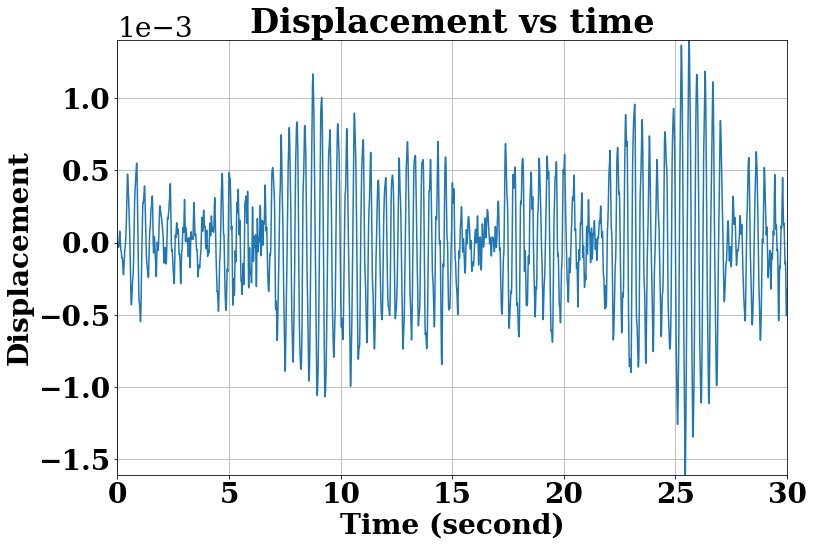

In [37]:
a=np.linspace(0,30,60001)
plt.rcParams["font.family"] = "serif"
plt.rcParams['font.size'] = 28
plt.figure(figsize = (12,8 ))
plt.xlim()
plt.plot(a,np.mean(y5_f, axis=0))
plt.yticks()
plt.title('Displacement vs time',fontweight='bold')
plt.xlabel('Time (second)',fontweight='bold')
plt.ylabel('Displacement',fontweight='bold')
plt.margins(0)
plt.xticks(fontweight='bold'); plt.yticks(fontweight='bold');
plt.ticklabel_format(axis='y',style='sci', scilimits=(0,-4))
plt.grid()
plt.savefig('states_3dof.png')
plt.show()

In [11]:
threshold = 0.18

Probabilty of Failure : 0.0123


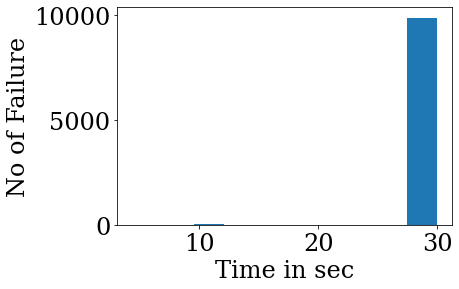

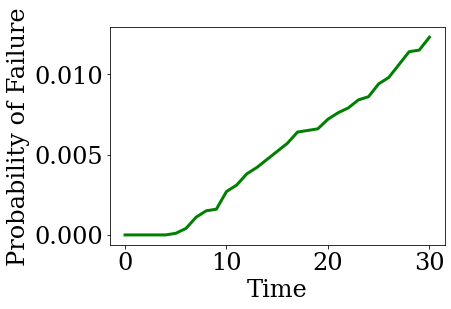

In [12]:
idx = [np.where(y5_a[i,:]>threshold) for i in range(10000)]

count = 0
for i in idx:
    if len(i[0])!=0:
        count += 1
        
print("Probabilty of Failure :", count/len(idx))

ans = []
for i in idx:
    if len(i[0])!=0:
        ans.append((i[0][0])/2000)
    else:
        ans.append(60000/2000)
        
plt.hist(ans)
plt.xlabel('Time in sec')
plt.ylabel('No of Failure')
plt.show()

pf_count_per_t = set()
prob_fail = []
for i in range(60001):
    colmn = y5_a[:,i]
    ans = np.where(colmn>threshold)
    for i in ans[0]:
        pf_count_per_t.add(i)
        
    no_of_fail = len(pf_count_per_t)
    prob_fail.append(no_of_fail/10000)
    
final_ans = []
for i in range(len(prob_fail)):
    if i%2000 == 0:
        final_ans.append(prob_fail[i])
    
plt.plot(final_ans, linewidth=3, color='green')
plt.xlabel('Time')
plt.ylabel('Probability of Failure')
plt.show()

Probabilty of Failure : 0.0122


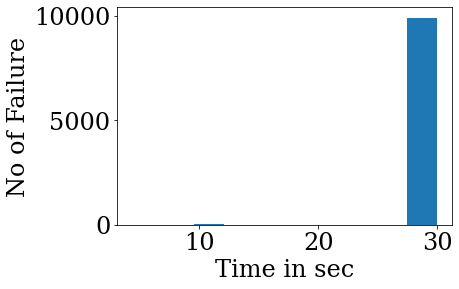

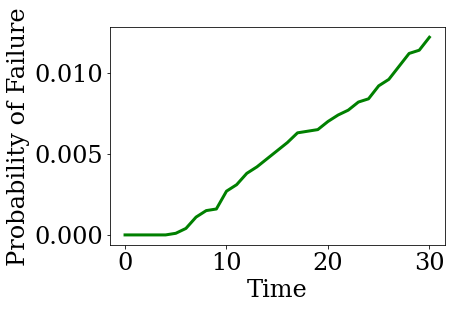

In [13]:
idx_2 = [np.where(y5_f[i,:]>threshold) for i in range(10000)]

count_2 = 0
for i in idx_2:
    if len(i[0])!=0:
        count_2 += 1
        
print("Probabilty of Failure :", count_2/len(idx_2))

ans_2 = []
for i in idx_2:
    if len(i[0])!=0:
        ans_2.append((i[0][0])/2000)
    else:
        ans_2.append(60000/2000)
        
plt.hist(ans_2)
plt.xlabel('Time in sec')
plt.ylabel('No of Failure')
plt.show()

pf_count_per_t_2 = set()
prob_fail_2 = []
for i in range(60001):
    colmn = y5_f[:,i]
    ans_2 = np.where(colmn>threshold)
    for i in ans_2[0]:
        pf_count_per_t_2.add(i)
        
    no_of_fail = len(pf_count_per_t_2)
    prob_fail_2.append(no_of_fail/10000)
    
final_ans_2 = []
for i in range(len(prob_fail_2)):
    if i%2000 == 0:
        final_ans_2.append(prob_fail_2[i])
    
plt.plot(final_ans_2, linewidth=3, color='green')
plt.xlabel('Time')
plt.ylabel('Probability of Failure')
plt.show()

In [14]:
max(prob_fail), max(prob_fail_2)

(0.0123, 0.0122)

In [15]:
index = np.arange(31)

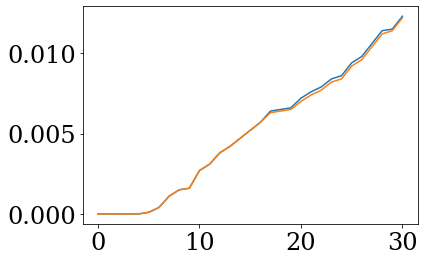

In [16]:
plt.plot(final_ans)
plt.plot(final_ans_2)

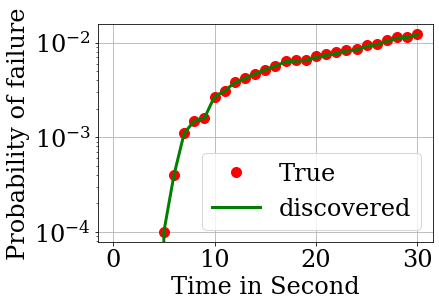

In [17]:
plt.figure()
plt.semilogy(index, final_ans, 'ro', label="True", markersize=10)
plt.semilogy(index, final_ans_2,color='green' ,linewidth=3, label="discovered")
plt.xlabel('Time in Second')
plt.ylabel('Probability of failure')
plt.legend()
plt.grid()
plt.savefig('reliability 3dof.pdf')
plt.show()

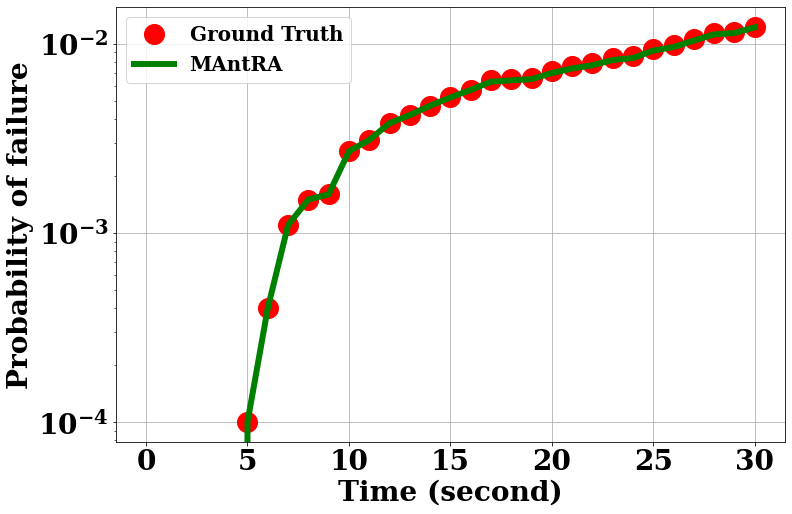

In [19]:
plt.rcParams["font.family"] = "serif"
plt.rcParams['font.size'] = 28
plt.figure(figsize = (12,8 ))
plt.semilogy(final_ans, 'ro', label="Ground Truth", markersize=20)
plt.semilogy(final_ans_2,color='green' ,linewidth=6, label="MAntRA")
plt.xlabel('Time (second)',fontweight='bold')
plt.ylabel('Probability of failure',fontweight='bold')
plt.xticks(fontweight='bold'); plt.yticks(fontweight='bold');
plt.legend(prop={'weight':'bold','size': 20},loc=2)
plt.grid()
plt.savefig('reliability 3dof.png')
plt.show()